<a href="https://colab.research.google.com/github/Franvmacias/Coderhouse/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entrega Final

##1.- Introducción

Abstract:
En Chile desde el año 1987 se realiza la encuesta CASEN (Encuesta de Caracterización Socioeconómica Nacional), es desarrollada por el Ministerio del Desarrollo Social y Familia, cada 3 o 4 años (dependiendo de las circunstancias y gobiernos de turno). Esta encuesta busca tener una imagen de cómo está el país socioeconómicamente hablando, ver la composición de los hogares, la educación e ingresos. La idea principal es obtener diagnósticos actualizados, identificar carencias y poder hacer planes a nivel de gobierno para apoyar a la gente que lo necesite. La encuesta tiene una cobertura a nivel nacional y contiene distintas variables anonimizadas y con sus respectivos factores de expansión para representar al área que indican.
Durante este proyecto quisiera investigar si existe una brecha salarial entre los distintos géneros que habitan en Chile y a partir de las diferencias qué tan probable es que una persona tenga un sueldo x o y, además aprovechar la extensión de esta encuesta para poder analizar los factores que afectan a la brecha, si es que la hubiera. Para esto trabajaremos con la Encuesta Casen 2020.

Objetivo: Determinar si existe una brecha salarial en Chile dentro de todos los géneros que habitan el país y descubrir cuales pueden ser las variables de interés que pueden acentuar esta brecha, en el caso de que exista.

Contexto Comercial: Esta encuesta no tiene un fin comercial pero si podmeos visualizar el ingreso/sueldo de cada persona, distinguir cuáles son las razones de ese ingreso y las zonas en dónde viven.

Problema Comercial: Ordenaremos, limpiaremos y formatearemos las variables de interés para poder responder de manera adecuada a la interrogante.

Contexto Análitico: Se obtiene la encuesta Casen 2023 que contiene la encuesta socioeconómica más grande Chile, esta contiene varias columnas de interés que nos pueden ayudar a dar ciertas respuestas a nuestros objetivos.

Realizaremos las siguientes tareas con los datos:
* Extraer los datos desde el SPSS almacenados en la página oficial de la encuesta CASEN
* Leer, transformar y preparar los datos para su visualización
* Analizar y construir visualizaciones de datos para identificar distintos patrones en el dataset
* Evaluar y definir distintos modelos de Machine Learning para poder reconocer distintas perspectivas

Adquisición de datos:
El dataset elegido se encuentra disponible a través de la página del Observatorio Nacional de Chile y  tiene todas sus versiones desde la primera 1987 a la última del año 2022, incluyendo sus versiones en STATA y SPSS, además de los manuales metodologicos y sus respectivas preguntas. En este caso trabajaremos con los datos de la Encuesta Casen 2022, en su versión más reciente se unen preguntas como orientación sexual e identidad de género y también, las respuestas son a través de un sistema de encuestas, el que permite una base de datos muchisimo más limpia que la existía.

Variables de Interés:
Region: Región en dónde vive
Zona: Zona rural o Urbana
Edad: Edad de la persona entrevistada
Sexo: Genero con el quye fue asignado al nacer
Ecivil: Estado civil
E6a: Nivel educativo más alto
E8: Institución donde realizó la educación superior
O7: Razón por la cual no buscó trabajo las últimas 4 semanas
Oficio1_08: Código de oficio, según CIUO 08
O32: Sistema Previsional en el cual cotiza
Ytot: Ingreso total
Contrato: Tiene contrato de trabajo


##2.- Aproximación al Dataset

###2.1.- Instalación de Librerías Especializadas

In [ ]:
pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.5 MB/s eta 0:00:00


In [ ]:
pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13163 sha256=a6551b9af652e94d4b2423f837f0342f00870ab90c67e2602457fcdb7ad60543
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [ ]:
pip install mlxtend

In [ ]:
pip install statsmodels

In [ ]:
pip install lightgbm

In [ ]:
pip install StandardScaler

  Preparing metadata (setup.py) ... done
  Created wheel for StandardScaler: filename=StandardScaler-0.5-py3-none-any.whl size=2597 sha256=8215f75ac6109de3be668ab645551553be6faefe376e67c420951efb1191dd38
  Stored in directory: /root/.cache/pip/wheels/6f/3d/07/ed324a52d8ce97682f9a6d184539debbd32c9bf66c5498a12b
Successfully built StandardScaler


In [ ]:
pip install featuretools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.4/754.4 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: holidays
    Found existing installation: holidays 0.36
    Uninstalling holidays-0.36:
      Successfully uninstalled holidays-0.36


In [ ]:
pip install xgboost

In [ ]:
pip install ppscore

In [ ]:
pip install xgboost

###2.2. Importación de Librerías:

In [ ]:
import warnings
import numpy as np
import pandas as pd
import ppscore as pps
import seaborn as sns
import xgboost as xgb
from scipy import stats
import matplotlib.cm as cm
from sklearn.svm import SVC
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score

###2.3.- Cargamos Dataset SAV

In [ ]:
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'
df_casen2020 = pd.read_spss('Datasets/Casen_en_Pandemia_2020_revisada202209.sav')

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [ ]:
#df_casen2020 = pd.read_spss('/Users/francisca.villagra/Desktop/Tools/Escuela/Casen/Casen/Casen_en_Pandemia_2020_revisada202209.sav')

In [ ]:
df_casen2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185437 entries, 0 to 185436
Columns: 643 entries, folio to v29
dtypes: category(355), float64(268), object(20)
memory usage: 478.7+ MB


###2.4.- Filtramos según nuestras variables de interés

In [ ]:
#La encuesta CASEN tiene 643 columnas, es por eso que se filtra
df = df_casen2020[['region', 'zona', 'edad', 'sexo', 'ecivil', 'e6a',  'o7', 'oficio1_08',  'o32', 'y1', 'ytoth', 'o15', 'o4']]

###2.5.- Revisamos cinco filas aleatorias

In [ ]:
df.sample(5)

,region,zona,edad,sexo,ecivil,e6a,o7,oficio1_08,o32,y1,ytoth,o15,o4
164899,Región de Los Ríos,Urbano,47.0,Hombre,Soltero(a),Educación Media Científico-Humanista,Busca cuando realmente lo necesita o tiene tra...,NaN,No está cotizando,NaN,689908.0,NaN,Sí
61587,Región del Libertador Gral. Bernardo O'Higgins,Urbano,68.0,Mujer,Casado(a),Educación Básica,Quehaceres del hogar,NaN,NaN,NaN,1200000.0,NaN,No
13380,Región de Antofagasta,Urbano,53.0,Hombre,Casado(a),Profesional Completo (Carreras 4 ó más años),NaN,"Profesionales, científicos e intelectuales","Sí, AFP (Administradora de Fondos de Pensiones)",320000.0,1020000.0,Empleado u obrero del sector privado,NaN
83551,Región del Biobío,Urbano,2.0,Hombre,NaN,Nunca asistió,NaN,NaN,NaN,NaN,428480.0,NaN,NaN
30008,Región de Coquimbo,Urbano,13.0,Hombre,NaN,Educación Básica,NaN,NaN,NaN,NaN,371859.0,NaN,NaN


###2.6.- Revisamos el tamaño del dataset

In [ ]:
df.shape

(185437, 13)

###2.7.- Información de las columnas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185437 entries, 0 to 185436
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   region      185437 non-null  category
 1   zona        185437 non-null  category
 2   edad        185437 non-null  float64 
 3   sexo        185437 non-null  category
 4   ecivil      153892 non-null  category
 5   e6a         185437 non-null  category
 6   o7          70476 non-null   category
 7   oficio1_08  70576 non-null   category
 8   o32         99239 non-null   category
 9   y1          40418 non-null   float64 
 10  ytoth       185437 non-null  float64 
 11  o15         70576 non-null   category
 12  o4          80739 non-null   category
dtypes: category(10), float64(3)
memory usage: 6.0 MB


###2.8.- Mostramos las variables númericas a través de valores estadisticos

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,185437.0,3.840159e+01,2.284338e+01,0.0,19.0,37.0,57.0,110.0
y1,40418.0,6.538916e+05,7.092225e+05,1200.0,320000.0,400000.0,750000.0,25000000.0
ytoth,185437.0,1.087862e+06,1.584013e+06,0.0,436626.0,731667.0,1223083.0,225200000.0


###2.9.- Mostramos las columnas del dataset

In [ ]:
df.columns

Index(['region', 'zona', 'edad', 'sexo', 'ecivil', 'e6a', 'o7', 'oficio1_08',
       'o32', 'y1', 'ytoth', 'o15', 'o4'],
      dtype='object')

###2.10.- Tipos de datos del dataset

In [ ]:
df.dtypes

region        category
zona          category
edad           float64
sexo          category
ecivil        category
e6a           category
o7            category
oficio1_08    category
o32           category
y1             float64
ytoth          float64
o15           category
o4            category
dtype: object

###2.11.- Revisamos nombres de variables para analizar si es necesario cambios en las variables

In [ ]:
df['region'].value_counts()

Región Metropolitana de Santiago                     39326
Región de Valparaíso                                 18505
Región del Biobío                                    17676
Región del Maule                                     12426
Región del Libertador Gral. Bernardo O'Higgins       12350
Región de La Araucanía                               11858
Región de Los Lagos                                  10513
Región de Tarapacá                                    8389
Región de Coquimbo                                    8161
Región de Los Ríos                                    7997
Región de Antofagasta                                 7599
Región de Atacama                                     7393
Región de Arica y Parinacota                          7227
Región de Ñuble                                       6350
Región de Magallanes y de la Antártica Chilena        5087
Región de Aysén del Gral. Carlos Ibáñez del Campo     4580
Name: region, dtype: int64

In [ ]:
df['zona'].value_counts()

Urbano    156082
Rural      29355
Name: zona, dtype: int64

In [ ]:
df['edad'].value_counts()

30.0     3082
20.0     2979
22.0     2876
24.0     2856
18.0     2824
         ... 
103.0       4
104.0       3
105.0       2
110.0       1
109.0       1
Name: edad, Length: 108, dtype: int64

In [ ]:
df['sexo'].value_counts()

Mujer     99341
Hombre    86096
Name: sexo, dtype: int64

In [ ]:
df['ecivil'].value_counts()

Soltero(a)                                         61809
Casado(a)                                          46888
Conviviente o pareja sin acuerdo de unión civil    22916
Viudo(a)                                            8832
Separado(a)                                         8713
Divorciado (a)                                      4053
Conviviente civil (con acuerdo de unión civil)       500
Anulado(a)                                           168
No sabe\No responde                                   13
Name: ecivil, dtype: int64

In [ ]:
df['e6a'].value_counts()

Educación Media Científico-Humanista                            48008
Educación Básica                                                47331
Profesional Completo (Carreras 4 ó más años)                    17956
Profesional Incompleto (Carreras 4 ó más años)                  13227
Educación Media Técnica Profesional                             13104
Técnico Nivel Superior Completo (Carreras 1 a 3 años)           10879
Nunca asistió                                                    8251
Técnico Nivel Superior Incompleto (Carreras 1 a 3 años)          5345
Primaria o Preparatoria (Sistema antiguo)                        4467
Prekínder / Kínder (Transición menor y Transición Mayor)         4436
Humanidades (Sistema Antiguo)                                    3988
Jardín Infantil (Medio menor y Medio mayor)                      2577
Postgrado Completo                                               1890
Técnica Comercial, Industrial o Normalista (Sistema Antiguo)     1559
Educación Especial (

In [ ]:
df['o7'].value_counts()

Jubilado(a), montepiado(a) o pensionado(a)                                                             20336
Estudiante                                                                                             18409
Quehaceres del hogar                                                                                   10300
Está enfermo o tiene una discapacidad                                                                   6622
No tiene con quien dejar los niños                                                                      3663
Por temor a contagiarse de COVID-19                                                                     2479
Otra razón. Especifique                                                                                 1566
No tiene interés en trabajar                                                                            1299
Cree que no hay trabajo disponible                                                                      1165
No tiene con quien 

In [ ]:
df['oficio1_08'].value_counts()

Trabajadores de los servicios y vendedores de comercios y mercados               14545
Ocupaciones elementales                                                          13584
Profesionales, científicos e intelectuales                                       11574
Artesanos y operarios de oficios                                                  9099
Técnicos y profesionales de nivel medio                                           7290
Operadores de instalaciones, máquinas y ensambladores                             5610
Personal de apoyo administrativo                                                  3768
Directores, gerentes y administradores                                            1952
Agricultores y trabajadores calificados agropecuarios, forestales y pesqueros     1549
No bien especificado                                                              1166
Ocupaciones de las Fuerzas Armadas                                                 277
No responde                                

In [ ]:
df['o32'].value_counts()

Sí, AFP (Administradora de Fondos de Pensiones)                                                                           60314
No está cotizando                                                                                                         33089
Sí, IPS ex INP [Caja Nacional de Empleados Públicos (CANAEMPU), Caja de Empleados Particulares (EMPART), Servicio de S     2148
No sabe                                                                                                                    1994
Sí, Caja de Previsión de la Defensa Nacional (CAPREDENA)                                                                    648
Sí, otra. Especifique                                                                                                       597
Sí, Dirección de Previsión de Carabineros (DIPRECA)                                                                         449
Name: o32, dtype: int64

In [ ]:
df['y1'].value_counts()

320000.0    2873
400000.0    2774
300000.0    2304
500000.0    2213
350000.0    2104
            ... 
905000.0       1
395850.0       1
300002.0       1
141681.0       1
659000.0       1
Name: y1, Length: 1114, dtype: int64

In [ ]:
df['ytoth'].value_counts()

0.0          3150
300000.0      847
500000.0      819
400000.0      763
600000.0      686
             ... 
208420.0        1
260354.0        1
441750.0        1
1285667.0       1
290417.0        1
Name: ytoth, Length: 35292, dtype: int64

###2.12.- Data Wrangling

In [ ]:
df.dtypes

region        category
zona          category
edad           float64
sexo          category
ecivil        category
e6a           category
o7            category
oficio1_08    category
o32           category
y1             float64
ytoth          float64
o15           category
o4            category
dtype: object

In [ ]:
####Unificamos variables que no necesitan tanto detalle
df = df.replace({'ecivil':
                 {'Anulado(a)':'Soltero(a)',
                  'Conviviente o pareja sin acuerdo de unión civil':'Soltero(a)',
                  'Conviviente civil (con acuerdo de unión civil)':'Casado(a)',
                  'Divorciado(a)':'Separado(a)',
                  'Anulado(a)':'Separado(a)'}})

df.ecivil.unique()

['Soltero(a)', NaN, 'Casado(a)', 'Viudo(a)', 'Divorciado (a)', 'Separado(a)', 'No sabe\No responde']
Categories (6, object): ['Casado(a)', 'Divorciado (a)', 'No sabe\No responde', 'Separado(a)',
                         'Soltero(a)', 'Viudo(a)']

In [ ]:
df = df.replace({'e6a':
                 {'Educación Media Científico-Humanista':'Educación Media',
                  'Educación Básica':'Educación Básica',
                  'Profesional Completo (Carreras 4 ó más años)':'Educación Universitaria Profesional',
                  'Profesional Incompleto (Carreras 4 ó más años)':'Educación Universitaria Profesional',
                  'Educación Media Técnica Profesional':'Educación Media',
                  'Técnico Nivel Superior Completo (Carreras 1 a 3 años)':'Educación Técnica',
                  'Técnico Nivel Superior Incompleto (Carreras 1 a 3 años)':'Educación Técnica',
                  'Primaria o Preparatoria (Sistema antiguo)':'Educación Básica',
                  'Prekínder / Kínder (Transición menor y Transición Mayor)':'Educación Básica',
                  'Humanidades (Sistema Antiguo)':'Educación Media',
                  'Jardín Infantil (Medio menor y Medio mayor)':'Educación Básica',
                  'Postgrado Completo':'Educación Universitaria Profesional',
                  'Técnica Comercial, Industrial o Normalista (Sistema Antiguo)':'Educación Técnica',
                  'Sala cuna':'Educación Básica',
                  'Postgrado Incompleto':'Educación Universitaria Profesional',

                  }})
df.e6a.unique()

['Educación Media', 'Educación Especial (Diferencial)', 'Educación Técnica', 'Educación Básica', 'Educación Universitaria Profesional', 'Nunca asistió']
Categories (6, object): ['Educación Básica', 'Educación Especial (Diferencial)', 'Educación Media',
                         'Nunca asistió', 'Educación Universitaria Profesional',
                         'Educación Técnica']

In [ ]:
df = df.replace({'o32':
                 {'Sí, AFP (Administradora de Fondos de Pensiones)':'Cotiza',
                  'No está cotizando':'No Cotiza',
                  'Sí, IPS ex INP [Caja Nacional de Empleados Públicos (CANAEMPU), Caja de Empleados Particulares (EMPART), Servicio de S':'Cotiza',
                  'Sí, Caja de Previsión de la Defensa Nacional (CAPREDENA)':'Cotiza',
                  'Sí, Dirección de Previsión de Carabineros (DIPRECA)':'Cotiza',
                  'Sí, otra. Especifique':'Cotiza'

                  }})
df.o32.unique()

[NaN, 'Cotiza', 'No Cotiza', 'No sabe']
Categories (3, object): ['No Cotiza', 'No sabe', 'Cotiza']

In [ ]:
df_casen2020.sexo.value_counts()


Mujer     99341
Hombre    86096
Name: sexo, dtype: int64

In [ ]:
df['genero'] = df['sexo'].apply(lambda x: 0 if x == 'Mujer' else 1)
#transformamos la columna sexo en la columna genero con sus variables ahora númericas

In [ ]:
df.genero.value_counts()

0    99341
1    86096
Name: genero, dtype: int64

In [ ]:
df['zonas'] = df['zona'].apply(lambda x: 0 if x == 'Rural' else 1)
#transformamos la columna zona en la columna zonas con sus variables ahora númericas

In [ ]:
#Convertimos los tipos de datos a números enteros
df['genero'] = df['genero'].astype('int64')
df['zonas'] = df['zonas'].astype('int64')

In [ ]:
#sacamos a los estudiantes y jubilados
df = df[(df.o7 != 'Estudiante')]
df = df[(df.o7 != 'Jubilado(a), montepiado(a) o pensionado(a)')]

In [ ]:
#transformamos a Dataframe ya que queda en Object
df = pd.DataFrame(df)

In [ ]:
#Eliminamos las columnas de zona y sexo, ya que nos quedamos con las columnas númericas
df.drop(['sexo','zona'], axis='columns', inplace=True)

In [ ]:
df.head()

,region,edad,ecivil,e6a,o7,oficio1_08,o32,y1,ytoth,o15,o4,genero,zonas
0,Región de Tarapacá,34.0,Soltero(a),Educación Media,NaN,Trabajadores de los servicios y vendedores de ...,NaN,NaN,390833.0,Trabajador por cuenta propia,NaN,0,1
1,Región de Tarapacá,4.0,NaN,Educación Especial (Diferencial),NaN,NaN,NaN,NaN,390833.0,NaN,NaN,0,1
2,Región de Tarapacá,45.0,Soltero(a),Educación Técnica,NaN,Trabajadores de los servicios y vendedores de ...,Cotiza,372000.0,947583.0,Empleado u obrero del sector privado,NaN,1,1
3,Región de Tarapacá,5.0,NaN,Educación Básica,NaN,NaN,NaN,NaN,947583.0,NaN,NaN,0,1
4,Región de Tarapacá,19.0,Soltero(a),Educación Técnica,NaN,Artesanos y operarios de oficios,NaN,NaN,947583.0,Trabajador por cuenta propia,NaN,0,1


##3.- EDA

###3.1.- Datos Iniciales

In [ ]:
#Contamos los datos que tenemos para cada columna
df.count()

region        146692
edad          146692
ecivil        115147
e6a           146692
o7             31731
oficio1_08     70576
o32            86842
y1             40418
ytoth         146692
o15            70576
o4             41994
genero        146692
zonas         146692
dtype: int64

In [ ]:
#vemos sus estadisticas para mayor información, solo veremos variables numericas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,146692.0,3.597753e+01,2.063047e+01,0.0,20.0,36.0,53.0,110.0
y1,40418.0,6.538916e+05,7.092225e+05,1200.0,320000.0,400000.0,750000.0,25000000.0
ytoth,146692.0,1.122321e+06,1.624884e+06,0.0,449495.0,755834.0,1265940.0,225200000.0
genero,146692.0,4.699438e-01,4.990975e-01,0.0,0.0,0.0,1.0,1.0
zonas,146692.0,8.413070e-01,3.653908e-01,0.0,1.0,1.0,1.0,1.0


In [ ]:
#Contando valores nulos
with pd.option_context('mode.use_inf_as_na', True):
    display(df.isna().sum())

region             0
edad               0
ecivil         31545
e6a                0
o7            114961
oficio1_08     76116
o32            59850
y1            106274
ytoth              0
o15            76116
o4            104698
genero             0
zonas              0
dtype: int64

In [ ]:
#Importamos las librerías necesarias para las visualizaciones
plt.style.use('seaborn-v0_8-pastel') #esto es para darle un estilo a gusto propio

###3.2.- Análisis Univariado

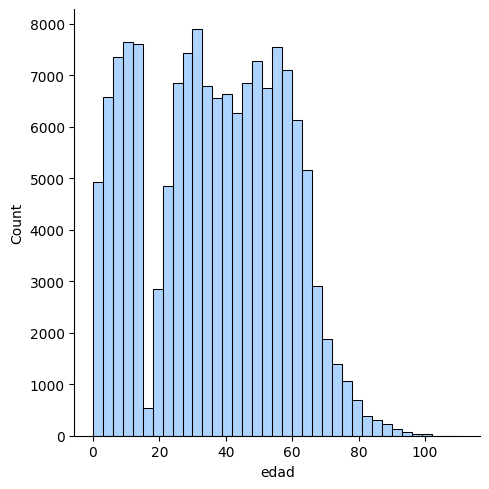

In [ ]:
#Analizamos la variable Edad
sns.displot(df, x="edad", binwidth=3);

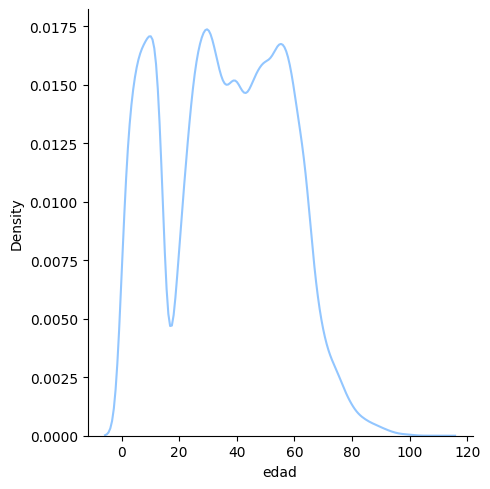

In [ ]:
sns.displot(df, x="edad", kind="kde");

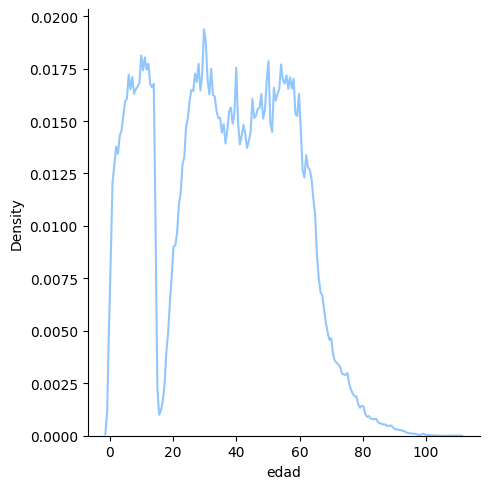

In [ ]:
sns.displot(df, x="edad", kind="kde", bw_adjust=.25);

####Podemos ver como tenemos un rango de edad muy completo, desde los 0 años, hasta mayores de 100, estos valores no son particularmente de los encuestados sino que tambien de su nucleo familiar.

######3.3.- Análisis Bivariado

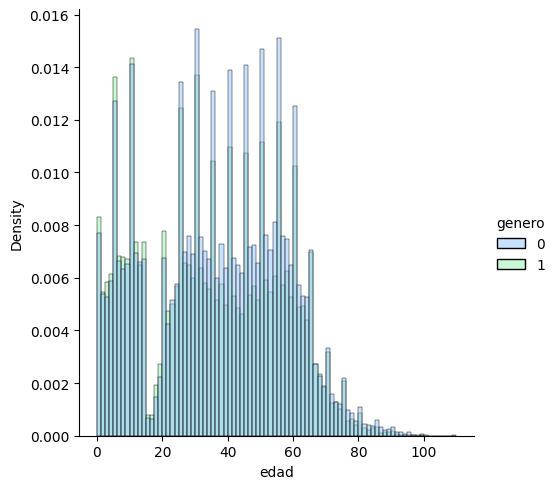

In [ ]:
sns.displot(df, x="edad", hue="genero", stat="density");

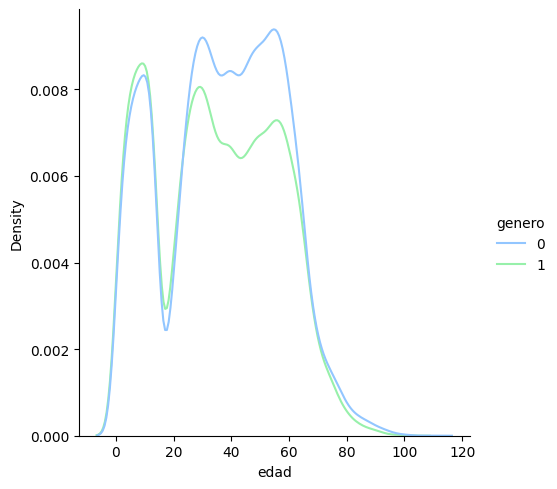

In [ ]:
sns.displot(df, x="edad", hue="genero", kind="kde");

####Con los últimos dos gráficos, se ve como claramente las mujeres sobresalen en esta encuesta, siendo mayoría desde los 25 años en adelante.

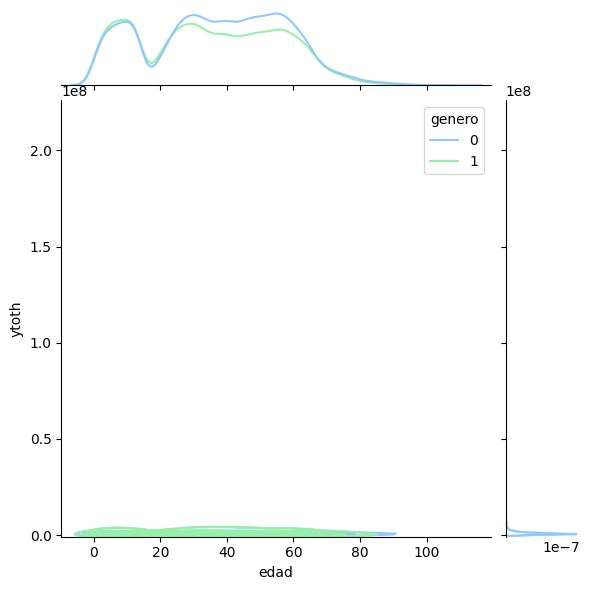

In [ ]:
sns.jointplot(data=df, x="edad", y="ytoth", hue="genero", kind="kde");

####Ahora si ingresamos la variable ytoth (total de ingresos en el hogar) podemos ver como claramente resalta la variable de genero masculina, a pesar que en nuestro dataset tengamos más mujeres.

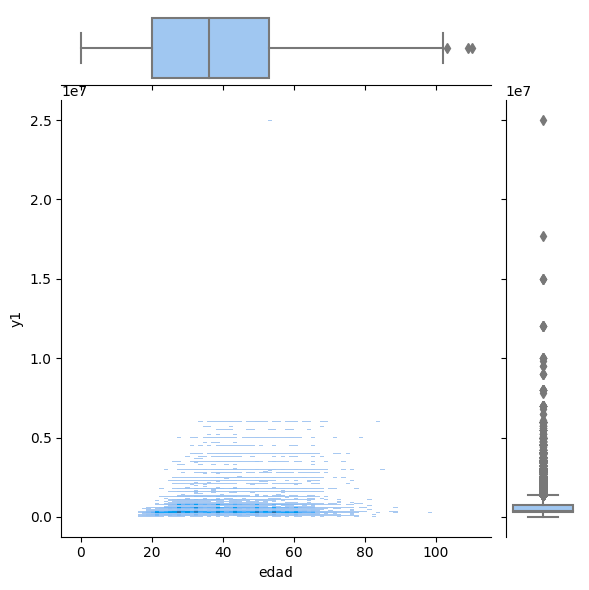

In [ ]:
g = sns.JointGrid(data=df, x="edad", y="y1");
g.plot_joint(sns.histplot);
g.plot_marginals(sns.boxplot);

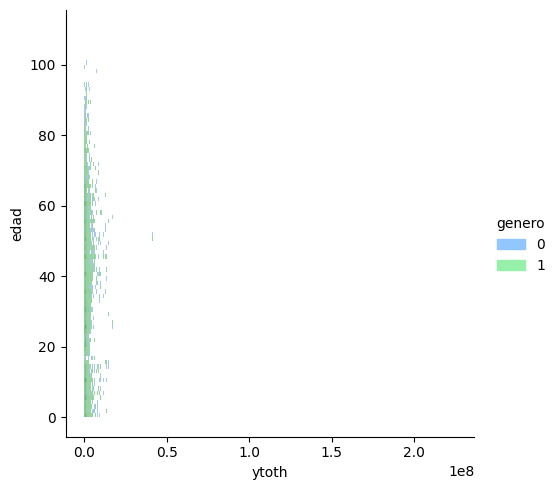

In [ ]:
sns.displot(df, x="ytoth", y="edad", hue="genero");

####Aquí podemos analizar algo que quizás sabíamos subjetivamente, las personas entre 20 a 50 años son las que más ingresos tienen, debido a que van aumentando año a año su experiencia y en su mayoría los estudios también van aumentando sus ingresos, después podemos observar una baja de ingresos que probablemente se deba a que la gente en Chile jubila aproximadamente a los 60 años.

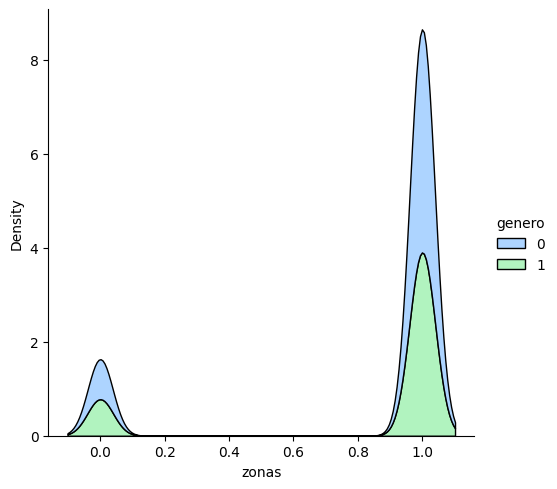

In [ ]:
sns.displot(df, x="zonas", hue="genero", kind="kde", multiple="stack");

####En este gráfico podemos ver como vuelven a resaltar las mujeres pero además podemos observar que la mayoría de la gente encuestada vive en una zona urbana y no rural.

In [ ]:
#filtramos el dataset por genero y edad para obtener solo a las personas que deberian estar disponibles para trabajar
muj = df[(df.genero == 1) & (df.edad >= 18)]
hom = df[(df.genero == 0) & (df.edad >= 18)]


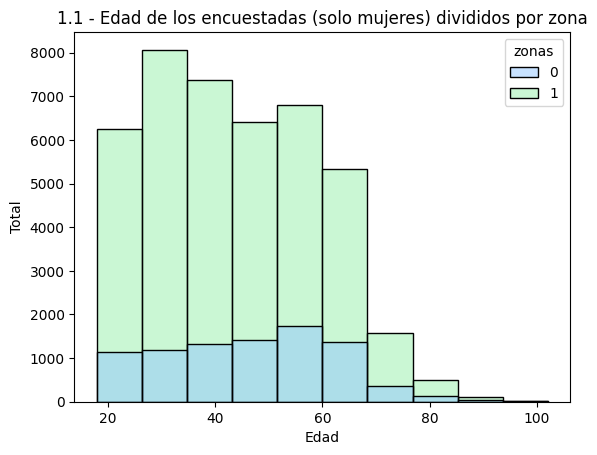

In [ ]:
sns.histplot(data=muj, x="edad", hue="zonas", bins=10);
plt.title('1.1 - Edad de los encuestadas (solo mujeres) divididos por zona');
plt.xlabel('Edad');
plt.ylabel('Total');

####Mujeres mayores de edad y dónde viven , 0 Rural y 1 Urbana

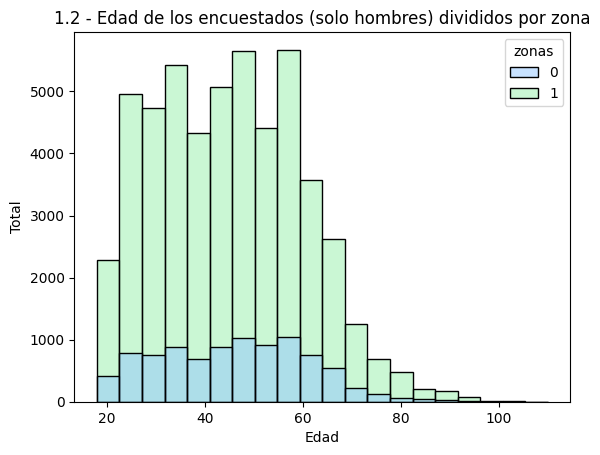

In [ ]:
sns.histplot(data=hom, x="edad", hue="zonas", bins=20);
plt.title('1.2 - Edad de los encuestados (solo hombres) divididos por zona');
plt.xlabel('Edad');
plt.ylabel('Total');

####Hombres mayores de edad y dónde viven , 0 Rural y 1 Urbana

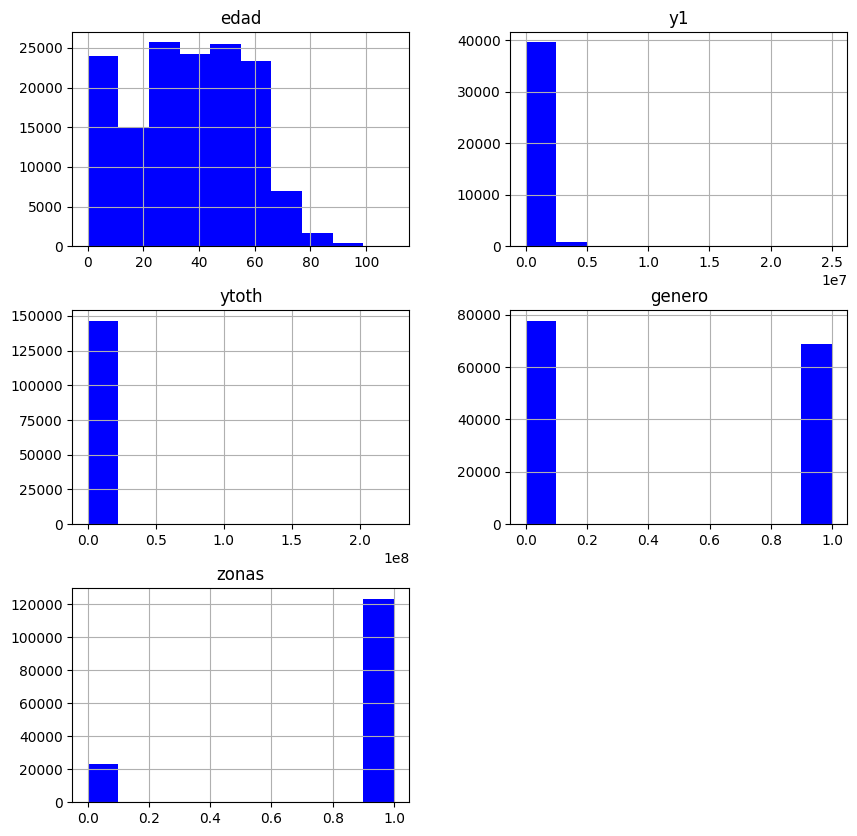

In [ ]:
hists = df.hist(figsize=(10,10), color = 'blue')

####Distribución de datos

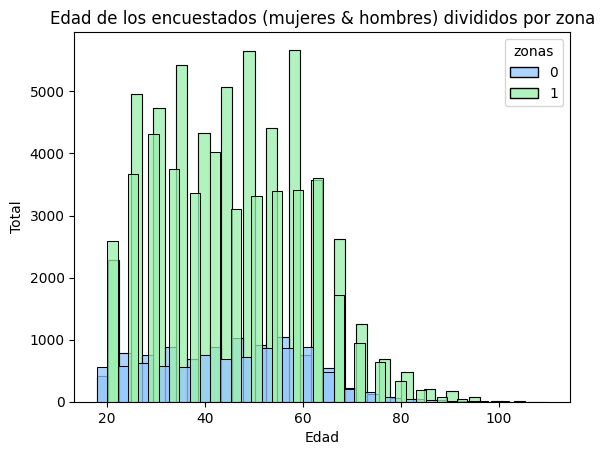

In [ ]:
sns.histplot(data=hom, x="edad", hue="zonas", bins=20, multiple="dodge", color='blue'); #dataset hombres
sns.histplot(data=muj, x="edad", hue="zonas", bins=20, multiple="dodge", color='red'); #dataset mujeres
plt.title('Edad de los encuestados (mujeres & hombres) divididos por zona');
plt.xlabel('Edad');
plt.ylabel('Total');

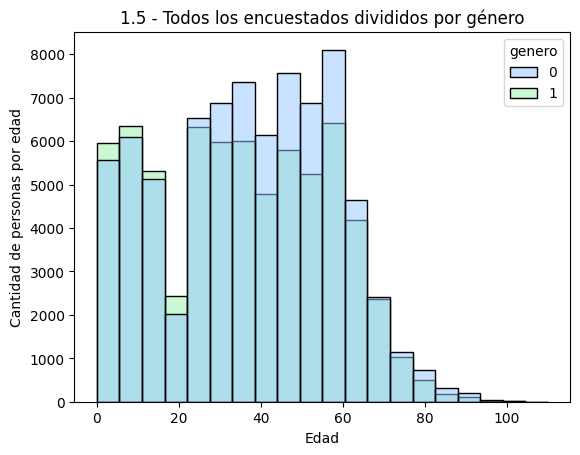

In [ ]:
sns.histplot(data=df, x="edad", hue="genero", bins=20);
plt.title('1.5 - Todos los encuestados divididos por género');
plt.xlabel('Edad');
plt.ylabel('Cantidad de personas por edad');

####Aquí podemos ver que las mujeres resaltan nuevamente en cuanto a cantidad y tambien en edad, podemos ver levemente como las mujeres podría ser más "longevas" que los hombres.

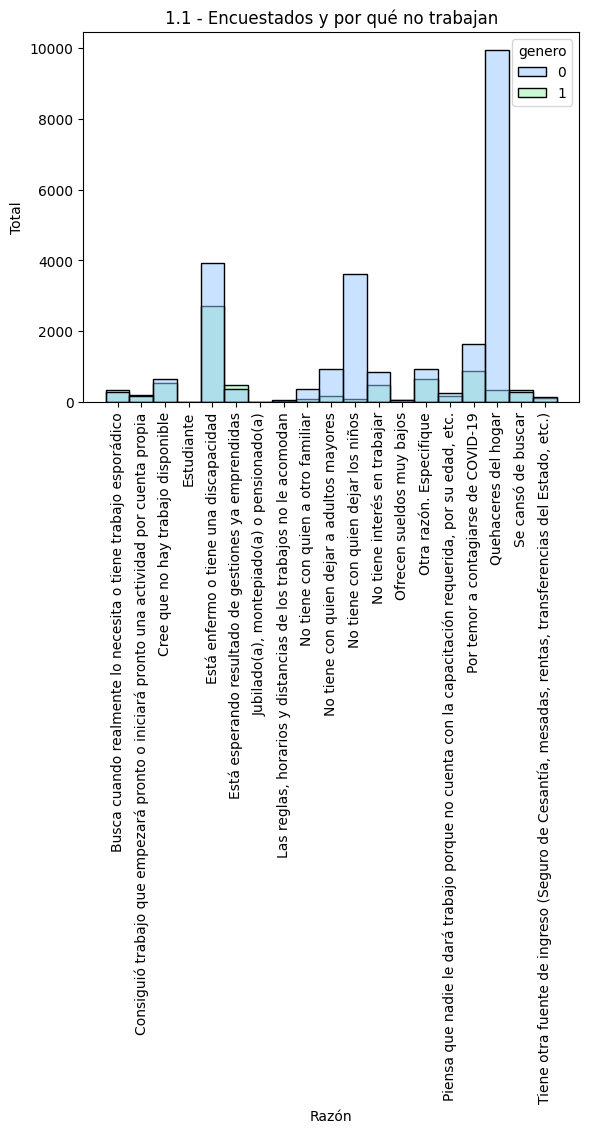

In [ ]:
sns.histplot(data=df, x="o7", hue="genero", bins=20);
plt.title('1.1 - Encuestados y por qué no trabajan');
plt.xlabel('Razón');
plt.ylabel('Total');
plt.xticks(rotation=90);

####Estudiantes y jubilados, se quedan fuera por el filtro que agregamos anteriormente. Ahora, resaltan nuevamente las mujeres, teniendo más problemas para obtener un trabajo, ya sean por razones domesticas, de cuidado o confianza en si misma (Glass ceiling), mientras que las primeras dos opciones que son en las que más resaltan los hombres demuestran más confianza en si mismos (resultados de gestiones, llamados pendientes, buscará cuando tenga oportunidad)

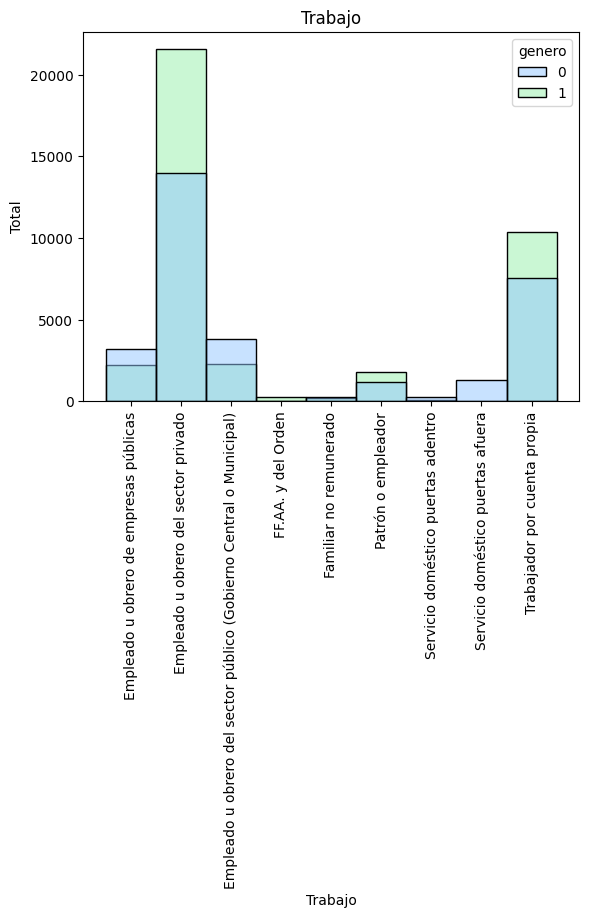

In [ ]:
sns.histplot(data=df, x="o15", hue="genero", bins=20);
plt.title('Trabajo');
plt.xlabel('Trabajo');
plt.ylabel('Total');
plt.xticks(rotation=90);

####Este gráfico resulta muy interesante, debido a que las mujeres resaltan en las áreas publicas y trabajo por cuenta propia (explicaría el tema de los quehaceres del hogar o servicios domesticos puertas afuera), ahora sabemos que los empleados publicos pueden acceder a sueldos menores que los privados, no es lo mismo ser asistente de parvulo en un jardin del estado a que una asistente de parvulo de una cadena de Sala Cunas.

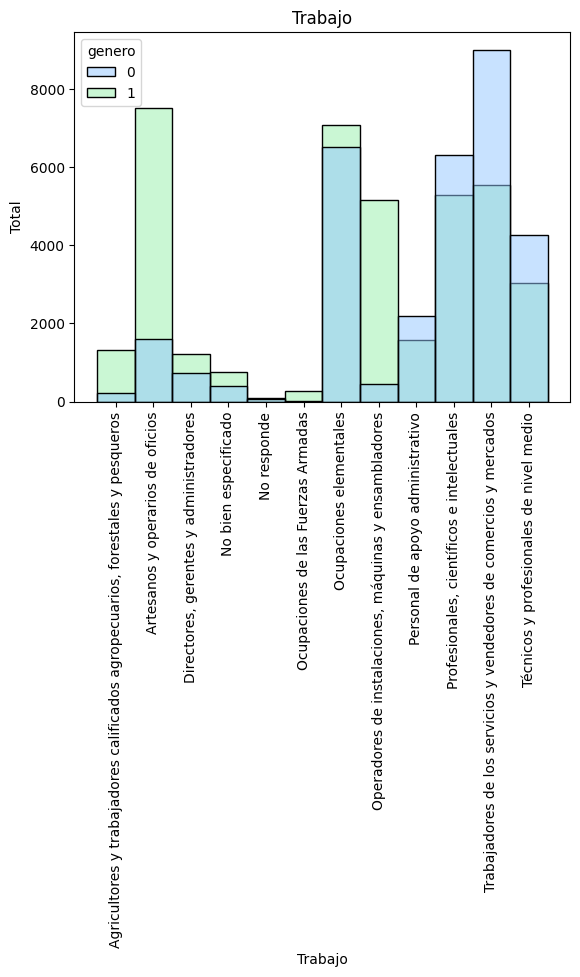

In [ ]:
sns.histplot(data=df, x="oficio1_08", hue="genero", bins=20);
plt.title('Trabajo');
plt.xlabel('Trabajo');
plt.ylabel('Total');
plt.xticks(rotation=90);

####Ahora, vemos que no es porque las mujeres tengan menos habilidades profesionales, de hecho resulta interesante saber que las mujeres si estudian y se preparan más para los cargos que los hombres, al menos en esta encuesta se ve claramente que son profesionarles ya sea a un nivel tecnico o profesional.

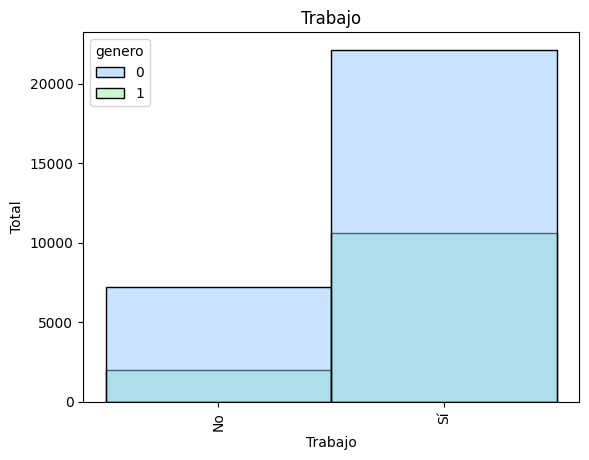

In [ ]:
sns.histplot(data=df, x="o4", hue="genero", bins=20);
plt.title('Trabajo');
plt.xlabel('Trabajo');
plt.ylabel('Total');
plt.xticks(rotation=90);

####En el gráfico anterior entre mujeres y hombres con trabajo, podemos ver que existen muchas más mujeres que trabajan que hombres pero también podemos ver que hay más mujeres que no trabajan que hombres.

###3.4.- Análisis Multivariado

In [ ]:
#Creamos diferentes variables para cada tipo
pd.set_option('display.max_seq_items', None)
categoricas = df.select_dtypes(['object', 'category']).columns
numericas = df.select_dtypes(['int','float64']).columns


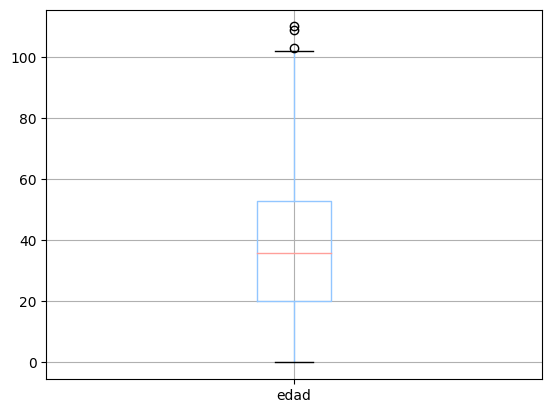

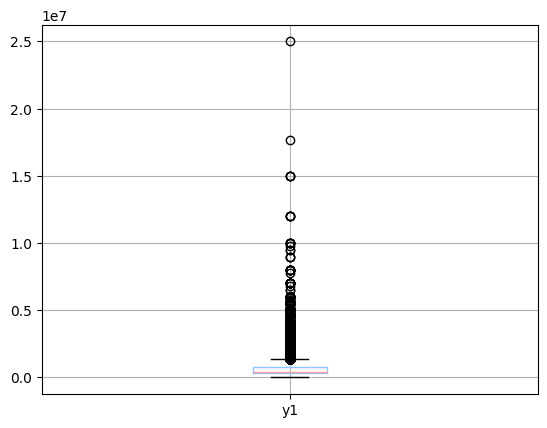

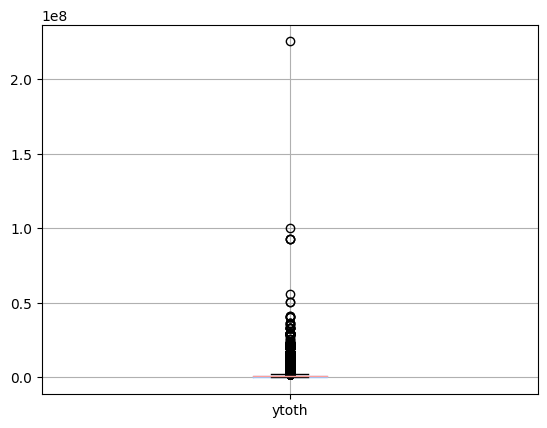

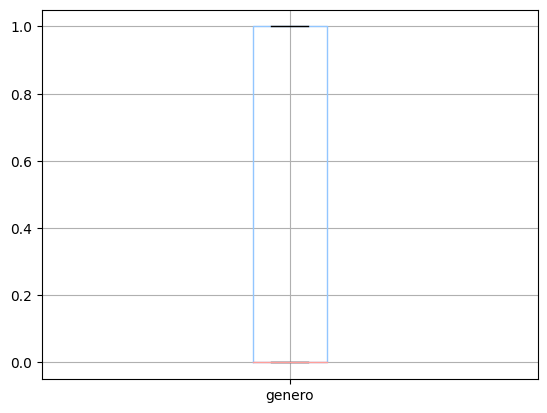

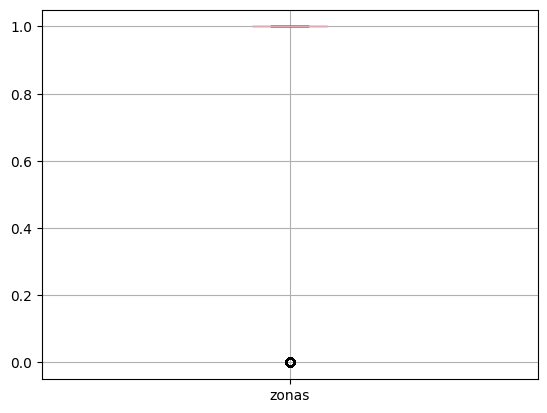

In [ ]:
#Creamos los siguientes boxplots para ver los atípicos
for column in numericas:
    plt.figure()
    df.boxplot([column])

In [ ]:
#Atípicos calculados con la desviación estandar (3 sigmas)
(np.abs(stats.zscore(df[numericas]))>3).sum()

edad        32
y1           0
ytoth     2045
genero       0
zonas        0
dtype: int64

In [ ]:
#Atípicos calculados por cuantil
(df[numericas]<df[numericas].quantile(0.05)).sum()

edad      6963
y1        1669
ytoth     7331
genero       0
zonas        0
dtype: int64

In [ ]:
#Atípicos calculados por cuantil (95%)
(df[numericas]>df[numericas].quantile(0.95)).sum()

edad      7017
y1        1972
ytoth     7318
genero       0
zonas        0
dtype: int64

In [ ]:
#Eliminamos valores nulos
df.dropna(inplace = False)

,region,edad,ecivil,e6a,o7,oficio1_08,o32,y1,ytoth,o15,o4,genero,zonas


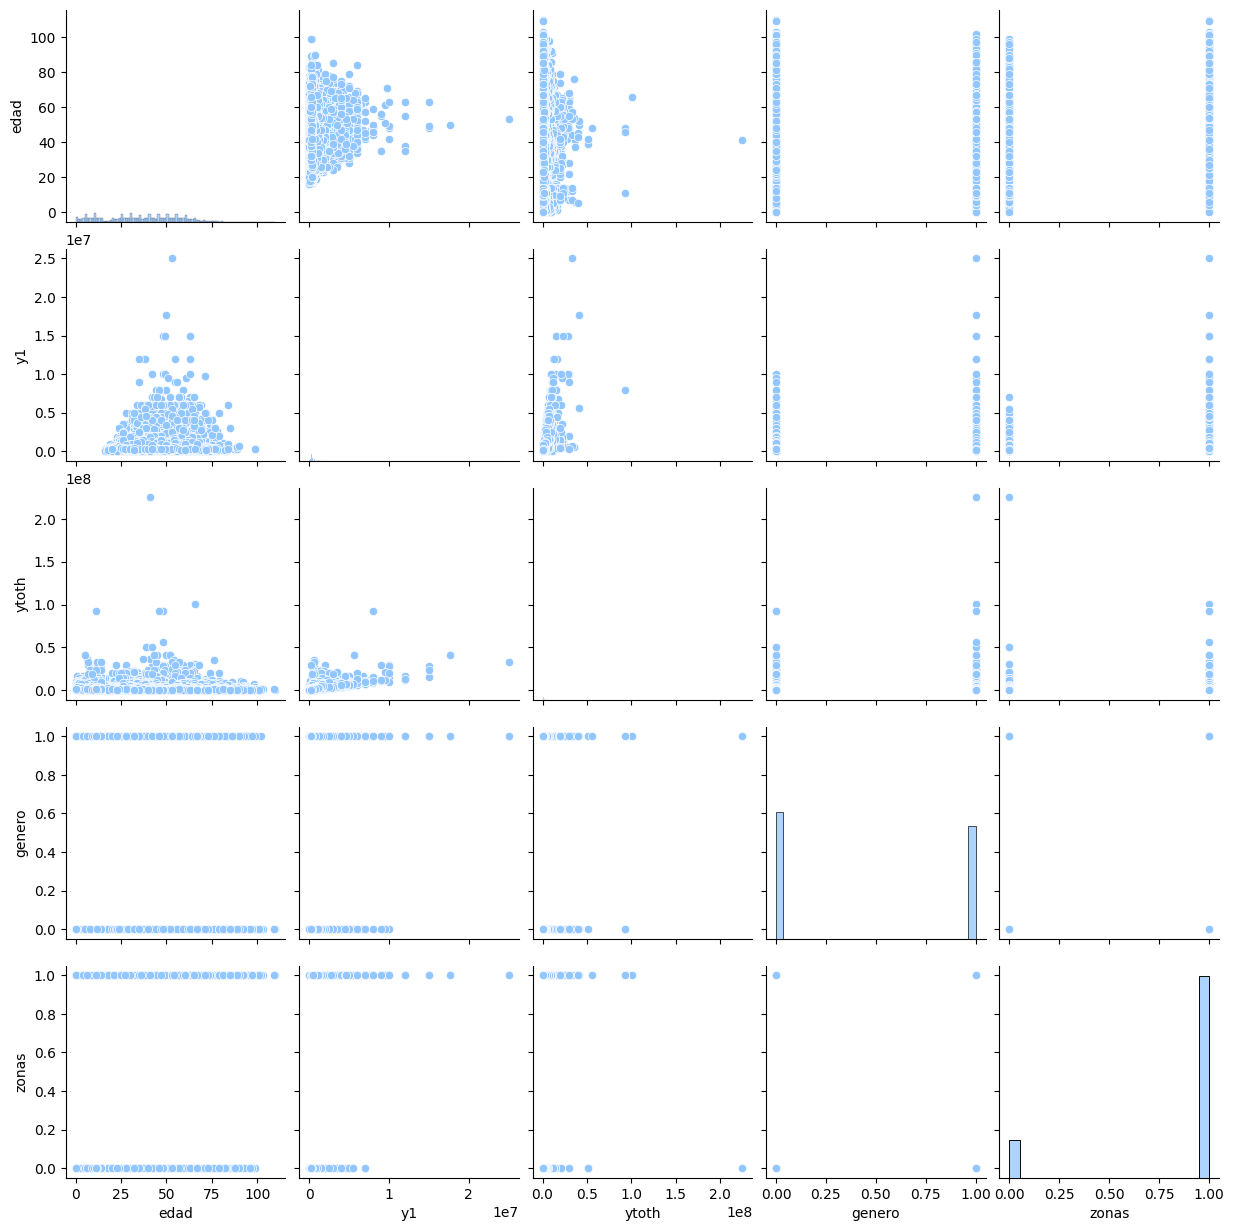

In [ ]:
#Gráfico relacional
sns.pairplot(df);

In [ ]:
#creación de datos de entrenamiento, esto servirá para eliminar outliers e imputaciones de variables númericas
ss = ShuffleSplit(n_splits=1, random_state=0, test_size=0.3)
for train_index, test_index in ss.split(df):
    print(len(train_index))
    print(len(test_index))
df['Train'] = 0
df.loc[df.index.isin(train_index),'Train'] = 1

102684
44008


In [ ]:
#Imputación de variables númericas
for var in numericas:
    x = df.loc[df['Train'] == 1, var].mean()
    df[var].fillna(x, inplace = True)

In [ ]:
df1 = df.copy()

In [ ]:
df1 = df1.drop(columns=['region', 'ecivil', 'e6a', 'oficio1_08', 'o32', 'o7', 'o15','o4' ])


In [ ]:
df1 #extraimos solo variables numericas para la corr

,edad,y1,ytoth,genero,zonas,Train
0,34.0,653856.664219,390833.0,0,1,0
1,4.0,653856.664219,390833.0,0,1,1
2,45.0,372000.000000,947583.0,1,1,1
3,5.0,653856.664219,947583.0,0,1,0
4,19.0,653856.664219,947583.0,0,1,1
...,...,...,...,...,...,...
185425,40.0,653856.664219,535104.0,0,0,0
185427,23.0,653856.664219,535104.0,1,0,0
185430,48.0,653856.664219,273750.0,0,0,0
185431,48.0,653856.664219,273750.0,1,0,0


In [ ]:
#Spearman correlation
df1.corr(method = 'spearman')

,edad,y1,ytoth,genero,zonas,Train
edad,1.000000,-0.067064,-0.043883,-0.049771,-0.029884,-0.001422
y1,-0.067064,1.000000,0.114277,-0.007623,0.037404,0.000787
ytoth,-0.043883,0.114277,1.000000,0.035555,0.122127,0.001299
genero,-0.049771,-0.007623,0.035555,1.000000,-0.019221,0.001667
zonas,-0.029884,0.037404,0.122127,-0.019221,1.000000,-0.000156
Train,-0.001422,0.000787,0.001299,0.001667,-0.000156,1.000000


In [ ]:
# Predictive Power Score
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 500
ppscoreT = pps.matrix(df)
ppscoreT.loc[ppscoreT['y']=='o32']


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
6,region,o32,0.000000e+00,classification,True,weighted F1,0.549400,0.549185,DecisionTreeClassifier()
20,edad,o32,8.712461e-02,classification,True,weighted F1,0.549400,0.588658,DecisionTreeClassifier()
34,ecivil,o32,3.073588e-02,classification,True,weighted F1,0.549400,0.563250,DecisionTreeClassifier()
48,e6a,o32,0.000000e+00,classification,True,weighted F1,0.549400,0.549185,DecisionTreeClassifier()
62,o7,o32,3.297801e-02,classification,True,weighted F1,0.521800,0.537570,DecisionTreeClassifier()
76,oficio1_08,o32,1.860571e-07,classification,True,weighted F1,0.701725,0.701725,DecisionTreeClassifier()
90,o32,o32,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
104,y1,o32,6.239348e-02,classification,True,weighted F1,0.549400,0.577515,DecisionTreeClassifier()
118,ytoth,o32,9.183433e-02,classification,True,weighted F1,0.549400,0.590781,DecisionTreeClassifier()
132,o15,o32,3.367111e-01,classification,True,weighted F1,0.701725,0.802157,DecisionTreeClassifier()


In [ ]:
# Predictive Power Score
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 500
ppscoreT = pps.matrix(df)
ppscoreT.loc[ppscoreT['y']=='oficio1_08']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
5,region,oficio1_08,0.018939,classification,True,weighted F1,0.1462,0.162370,DecisionTreeClassifier()
19,edad,oficio1_08,0.024396,classification,True,weighted F1,0.1462,0.167029,DecisionTreeClassifier()
33,ecivil,oficio1_08,0.000000,classification,True,weighted F1,0.1462,0.103182,DecisionTreeClassifier()
47,e6a,oficio1_08,0.196670,classification,True,weighted F1,0.1462,0.314117,DecisionTreeClassifier()
61,o7,oficio1_08,0.000000,empty_dataframe_after_dropping_na,False,None,0.0000,0.000000,None
75,oficio1_08,oficio1_08,1.000000,predict_itself,True,None,0.0000,1.000000,None
89,o32,oficio1_08,0.000000,classification,True,weighted F1,0.1328,0.110899,DecisionTreeClassifier()
103,y1,oficio1_08,0.128438,classification,True,weighted F1,0.1462,0.255860,DecisionTreeClassifier()
117,ytoth,oficio1_08,0.074471,classification,True,weighted F1,0.1462,0.209784,DecisionTreeClassifier()
131,o15,oficio1_08,0.065352,classification,True,weighted F1,0.1462,0.201998,DecisionTreeClassifier()


In [ ]:
# Predictive Power Score
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 500
ppscoreT = pps.matrix(df)
ppscoreT.loc[ppscoreT['y']=='o7']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
4,region,o7,0.000000,classification,True,weighted F1,0.1656,0.148243,DecisionTreeClassifier()
18,edad,o7,0.126906,classification,True,weighted F1,0.1656,0.271490,DecisionTreeClassifier()
32,ecivil,o7,0.067964,classification,True,weighted F1,0.1656,0.222309,DecisionTreeClassifier()
46,e6a,o7,0.031696,classification,True,weighted F1,0.1656,0.192047,DecisionTreeClassifier()
60,o7,o7,1.000000,predict_itself,True,None,0.0000,1.000000,None
74,oficio1_08,o7,0.000000,empty_dataframe_after_dropping_na,False,None,0.0000,0.000000,None
88,o32,o7,0.000000,classification,True,weighted F1,0.1500,0.119572,DecisionTreeClassifier()
102,y1,o7,0.000000,classification,True,weighted F1,0.1656,0.143228,DecisionTreeClassifier()
116,ytoth,o7,0.023463,classification,True,weighted F1,0.1656,0.185178,DecisionTreeClassifier()
130,o15,o7,0.000000,empty_dataframe_after_dropping_na,False,None,0.0000,0.000000,None


In [ ]:
# Predictive Power Score
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 500
ppscoreT = pps.matrix(df)
ppscoreT.loc[ppscoreT['y']=='e6a']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
3,region,e6a,0.011657,classification,True,weighted F1,0.2866,0.294916,DecisionTreeClassifier()
17,edad,e6a,0.264274,classification,True,weighted F1,0.2866,0.475133,DecisionTreeClassifier()
31,ecivil,e6a,0.000000,classification,True,weighted F1,0.3034,0.281333,DecisionTreeClassifier()
45,e6a,e6a,1.000000,predict_itself,True,None,0.0000,1.000000,None
59,o7,e6a,0.110767,classification,True,weighted F1,0.3202,0.395499,DecisionTreeClassifier()
73,oficio1_08,e6a,0.415924,classification,True,weighted F1,0.2838,0.581685,DecisionTreeClassifier()
87,o32,e6a,0.000000,classification,True,weighted F1,0.2978,0.259215,DecisionTreeClassifier()
101,y1,e6a,0.142949,classification,True,weighted F1,0.2866,0.388580,DecisionTreeClassifier()
115,ytoth,e6a,0.044152,classification,True,weighted F1,0.2866,0.318098,DecisionTreeClassifier()
129,o15,e6a,0.097058,classification,True,weighted F1,0.2838,0.353313,DecisionTreeClassifier()


In [ ]:
# Predictive Power Score
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 500
ppscoreT = pps.matrix(df)
ppscoreT.loc[ppscoreT['y']=='edad']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
1,region,edad,0.000442,regression,True,mean absolute error,17.4200,17.412297,DecisionTreeRegressor()
15,edad,edad,1.000000,predict_itself,True,None,0.0000,1.000000,None
29,ecivil,edad,0.186016,regression,True,mean absolute error,13.0846,10.650653,DecisionTreeRegressor()
43,e6a,edad,0.060406,regression,True,mean absolute error,17.4200,16.367724,DecisionTreeRegressor()
57,o7,edad,0.134956,regression,True,mean absolute error,14.2474,12.324633,DecisionTreeRegressor()
71,oficio1_08,edad,0.011639,regression,True,mean absolute error,11.6308,11.495432,DecisionTreeRegressor()
85,o32,edad,0.007642,regression,True,mean absolute error,11.9904,11.898769,DecisionTreeRegressor()
99,y1,edad,0.006740,regression,True,mean absolute error,17.4200,17.302595,DecisionTreeRegressor()
113,ytoth,edad,0.000000,regression,True,mean absolute error,17.4200,23.022759,DecisionTreeRegressor()
127,o15,edad,0.018641,regression,True,mean absolute error,11.6308,11.413985,DecisionTreeRegressor()


In [ ]:
# Predictive Power Score
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 500
ppscoreT = pps.matrix(df)
ppscoreT.loc[ppscoreT['y']=='ytoth']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
8,region,ytoth,0.000000,regression,True,mean absolute error,718850.2068,796832.562181,DecisionTreeRegressor()
22,edad,ytoth,0.000000,regression,True,mean absolute error,718850.2068,836300.474398,DecisionTreeRegressor()
36,ecivil,ytoth,0.000000,regression,True,mean absolute error,721075.2286,800670.577852,DecisionTreeRegressor()
50,e6a,ytoth,0.000000,regression,True,mean absolute error,718850.2068,761782.474225,DecisionTreeRegressor()
64,o7,ytoth,0.000000,regression,True,mean absolute error,465932.7908,505765.126079,DecisionTreeRegressor()
78,oficio1_08,ytoth,0.019336,regression,True,mean absolute error,880262.0078,863241.312221,DecisionTreeRegressor()
92,o32,ytoth,0.000000,regression,True,mean absolute error,712572.1738,774850.073081,DecisionTreeRegressor()
106,y1,ytoth,0.016562,regression,True,mean absolute error,718850.2068,706944.553887,DecisionTreeRegressor()
120,ytoth,ytoth,1.000000,predict_itself,True,None,0.0000,1.000000,None
134,o15,ytoth,0.000000,regression,True,mean absolute error,880262.0078,983230.059403,DecisionTreeRegressor()


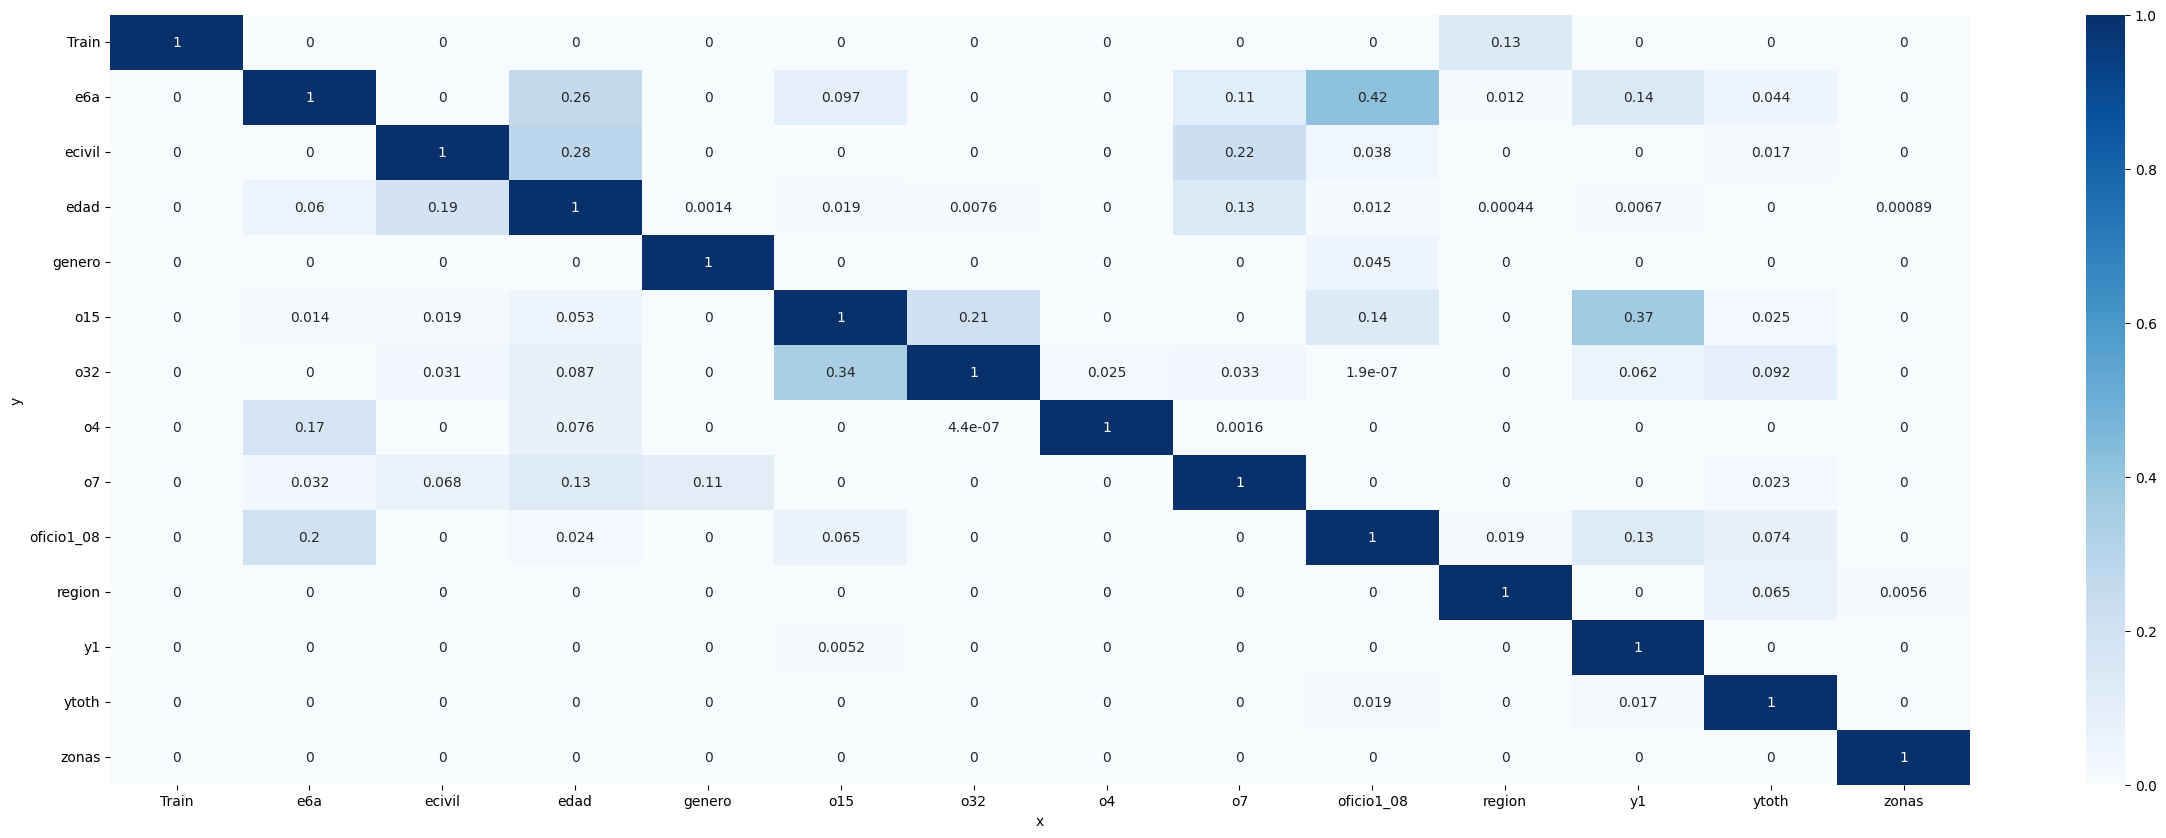

In [ ]:
#Exploración gráfica de las correlaciones hechas por ppscore
fig, ax = plt.subplots(figsize=(30,10));
matrix_df = ppscoreT[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore');
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", annot=True, ax = ax);

In [ ]:

# Escalamos todas las columnas
scaler = MinMaxScaler()
scaler.fit(df.loc[df['Train'] == 1, numericas])
df[numericas] = scaler.transform(df[numericas])

###En la última sección del EDA, se realizan diversos análisis de correlación entre variables y se termina escalandolas para que al hacer los pasos siguientes todas esten dentro de las mismas escalas. Ahora, dentro de este análisis podemos ver como variables como o15, e6a, ecivil, edad y oficio resaltan como correlaciones, si bien no son las mejores metricas estás si están correlacionadas de manera debil pero sirven para poder analizar en un modelo si pueden llegar a predecir el genero de una persona dependiendo de todas las demás.

##4.- Feature Engineer

In [ ]:
df2 = df.copy()
df2
df3 = df.copy()

In [ ]:
# normalizar data
X = df1.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

###Cluster & Cálculos

In [ ]:
# diccionarios vacios para ser almacenados los resultados
sse,db,slc,cal = {}, {}, {}, {}
for k in range(2, 10): #desde 2 cluster hasta 9
    # semilla de 10 para asegurar reproducibilidad
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X) # Algoritmo K means
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_ # Extraccion de labels y guardamos clusters
    sse[k] = kmeans.inertia_ # Inercia: Suma de las distancias de las muestras a su centroide mas cercano
    db[k] = davies_bouldin_score(X,clusters) # Calculo del indice de Davies Bouldin
    slc[k] = silhouette_score(X,clusters) # Calculo del indice de Silhouette
    cal[k] = calinski_harabasz_score(X,clusters) # Calculo del indice de Calinski-Harabasz


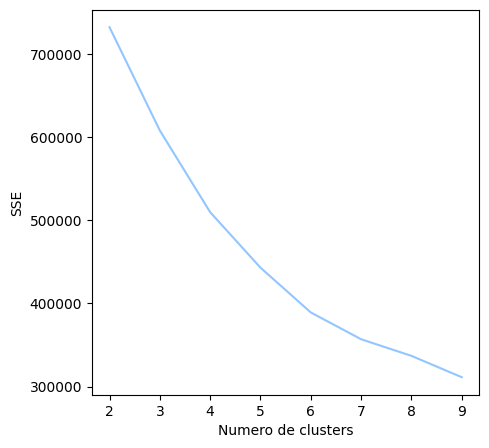

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("SSE")
plt.show()

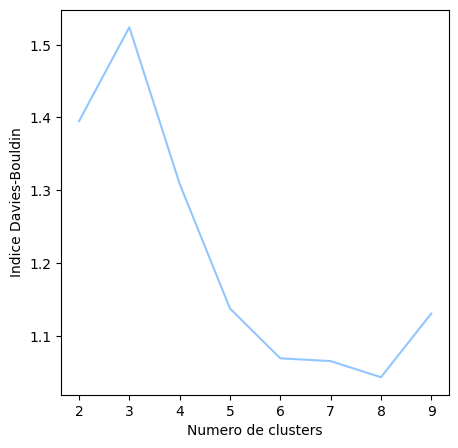

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("Indice Davies-Bouldin")
plt.show()

Para n_clusters = 2 El promedio del score de silhouette es:  0.3107800321119947
Para n_clusters = 3 El promedio del score de silhouette es:  0.2857662062872099
Para n_clusters = 4 El promedio del score de silhouette es:  0.29519861106252093
Para n_clusters = 5 El promedio del score de silhouette es:  0.3070448889555258
Para n_clusters = 6 El promedio del score de silhouette es:  0.3733746028171205
Para n_clusters = 7 El promedio del score de silhouette es:  0.37992789642516284
Para n_clusters = 8 El promedio del score de silhouette es:  0.35257985372413303
Para n_clusters = 9 El promedio del score de silhouette es:  0.37159867775920624


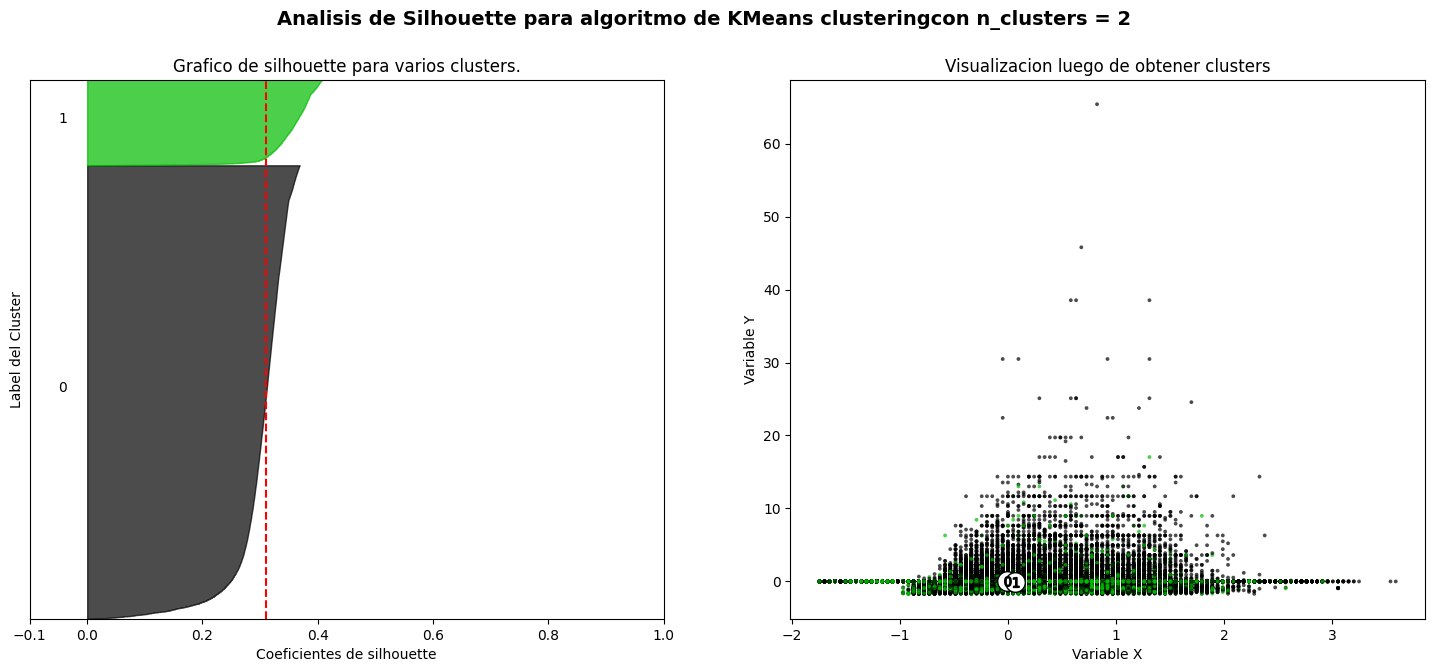

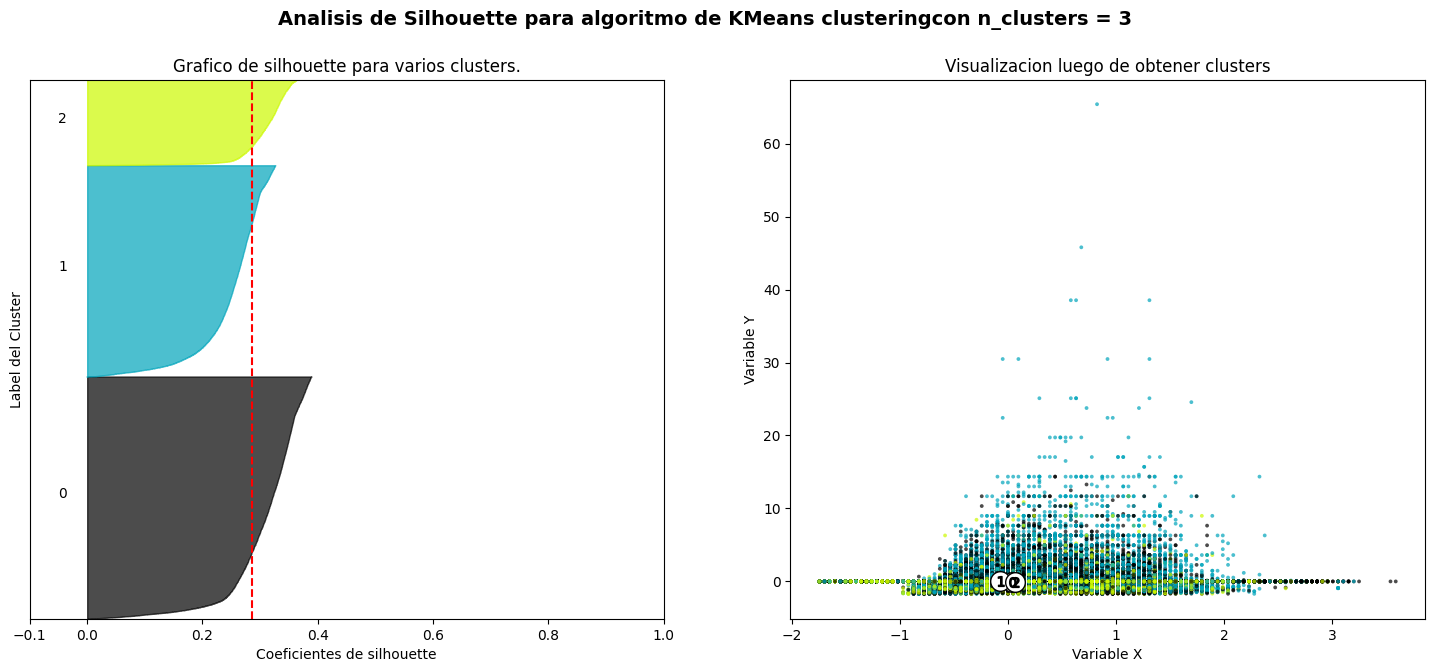

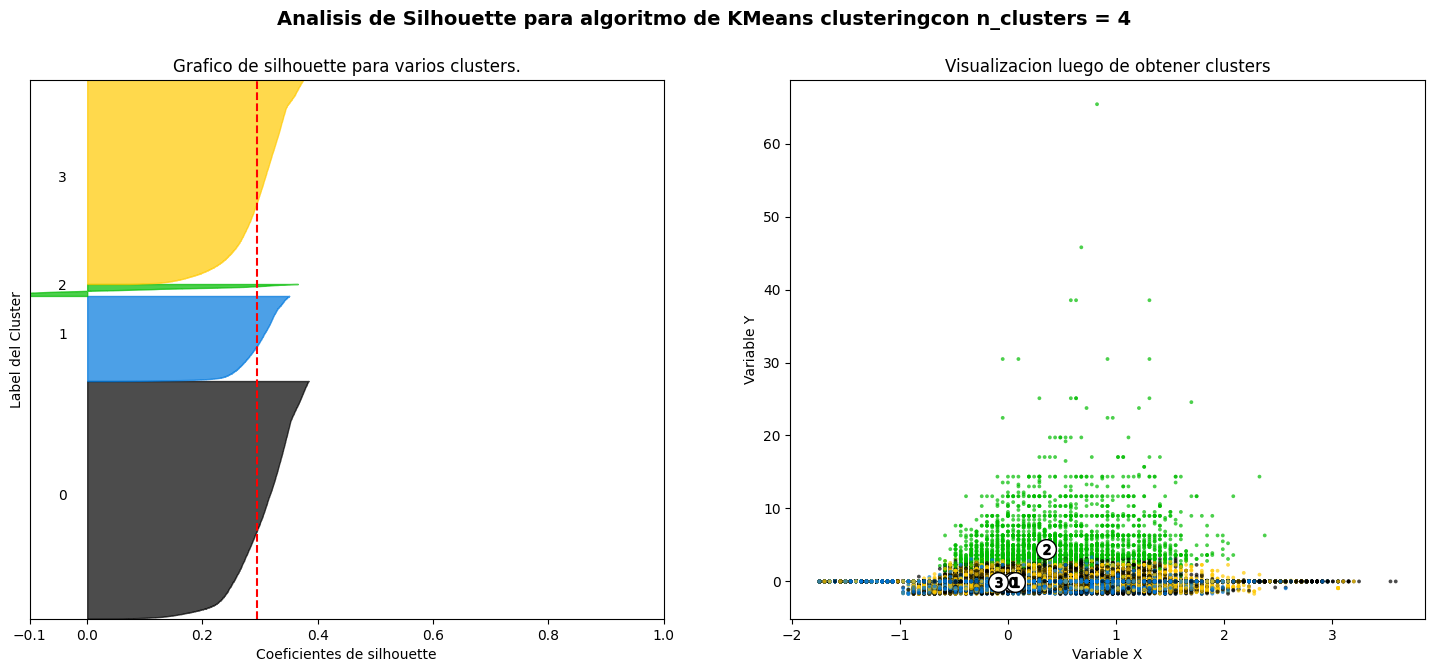

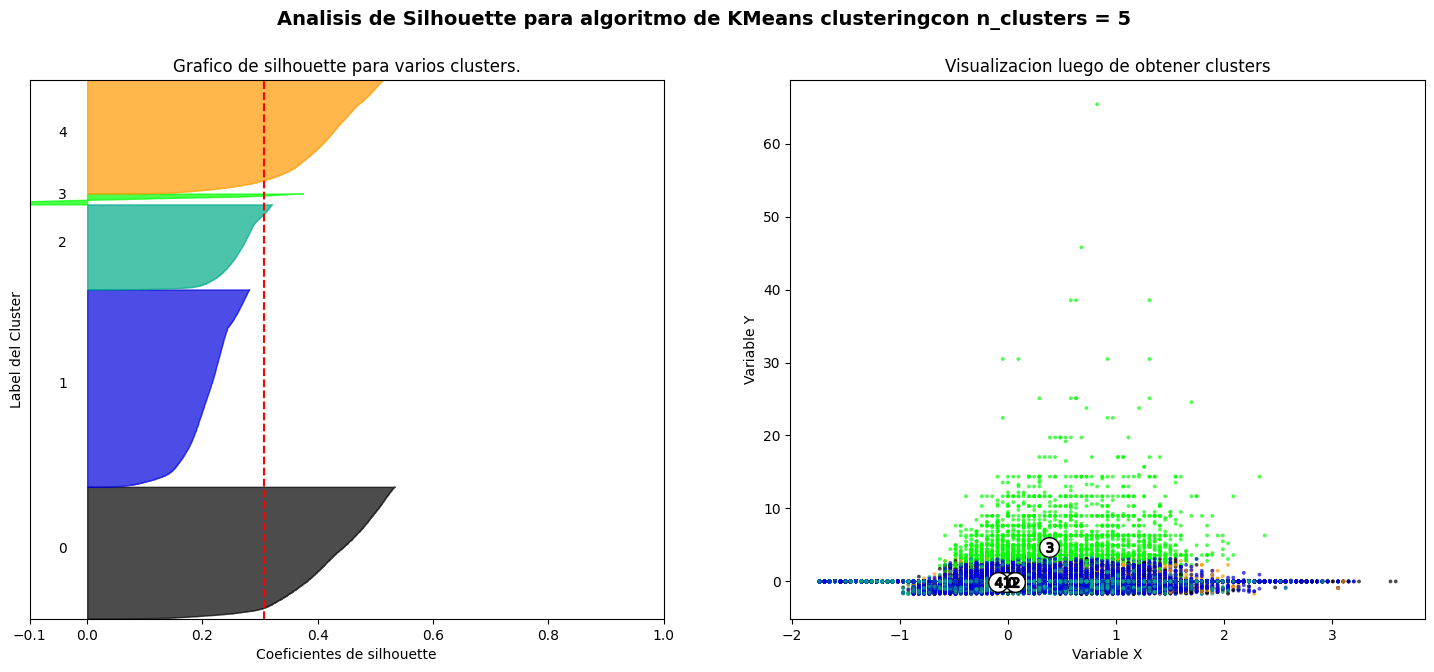

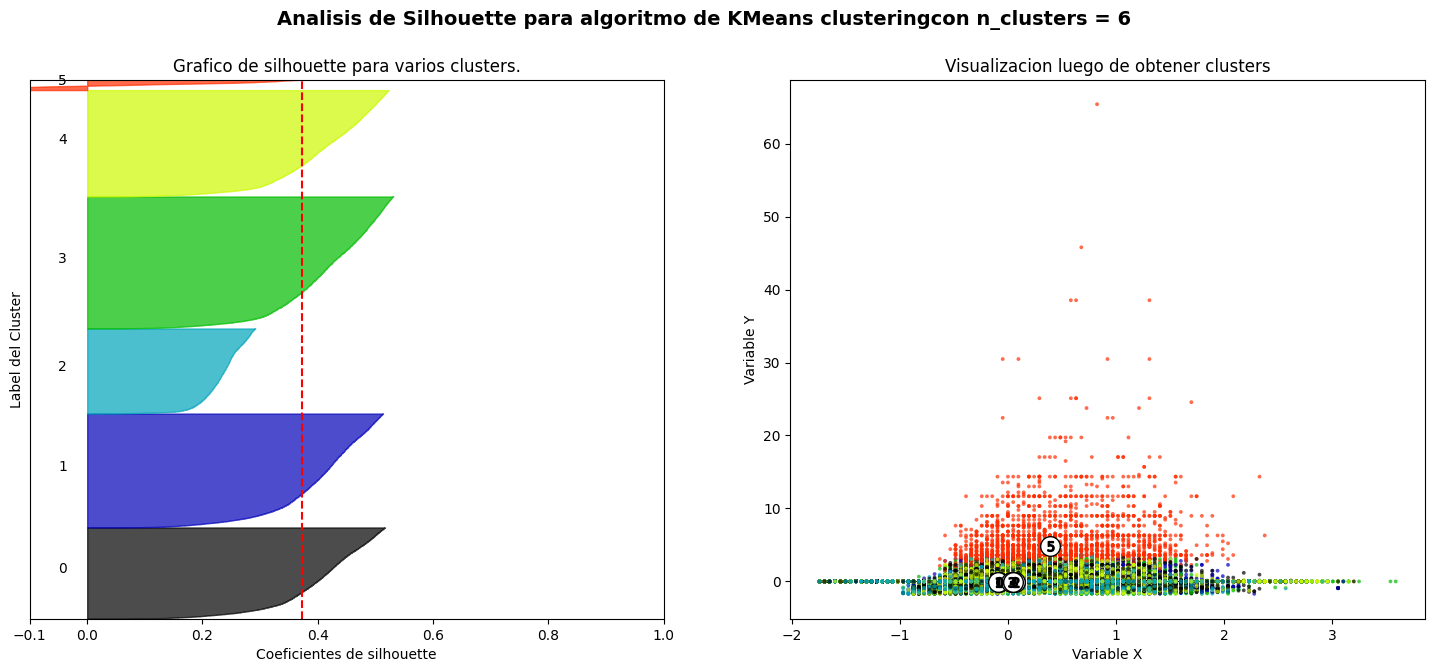

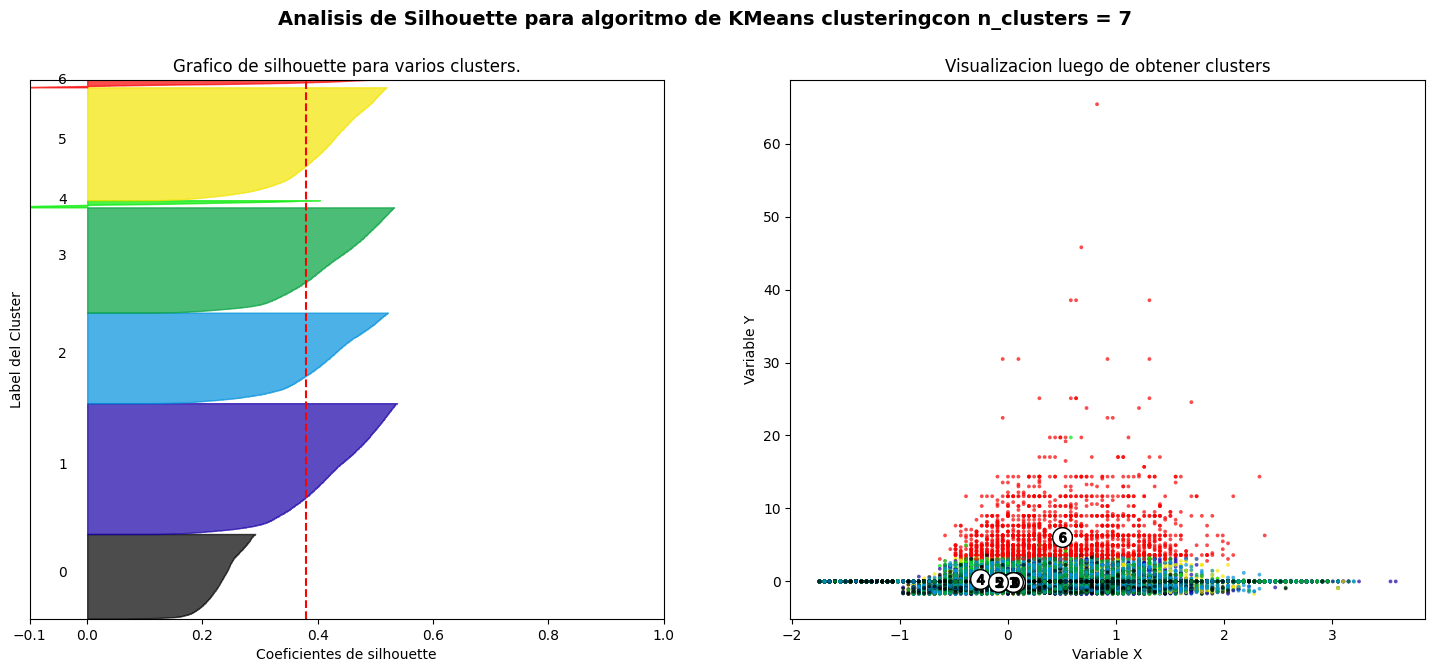

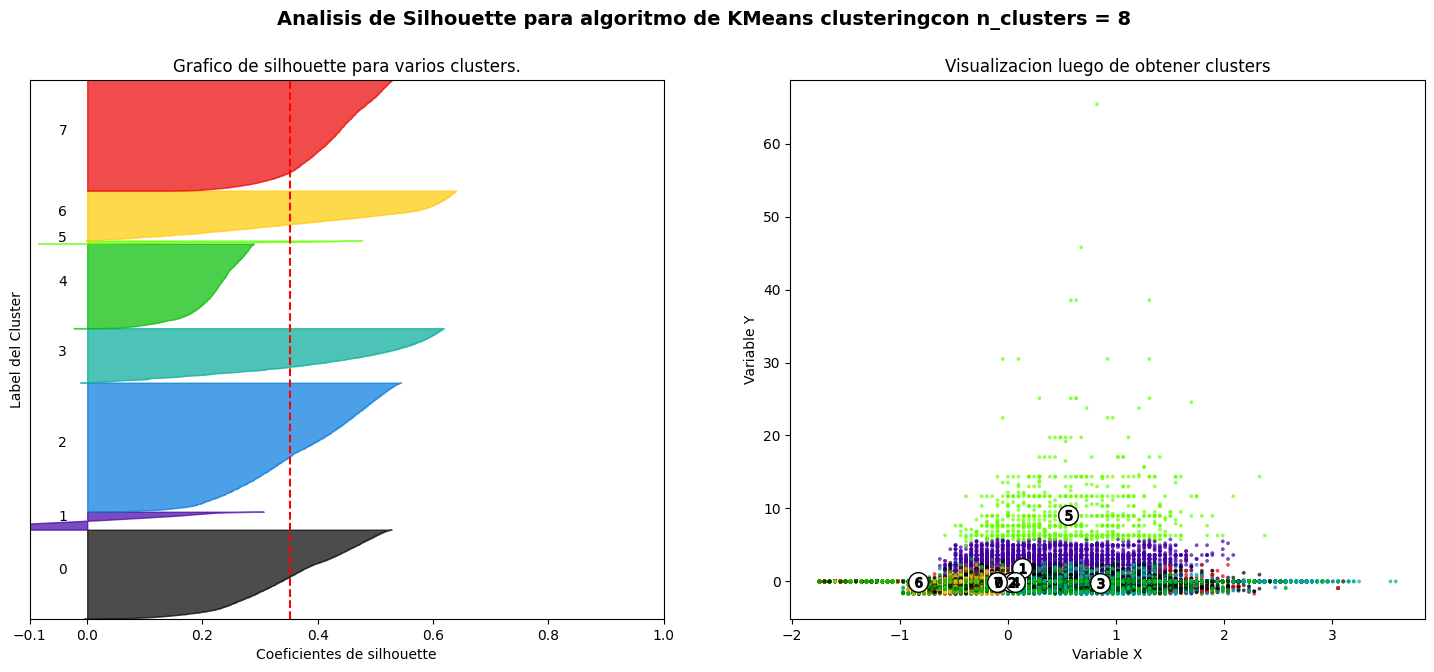

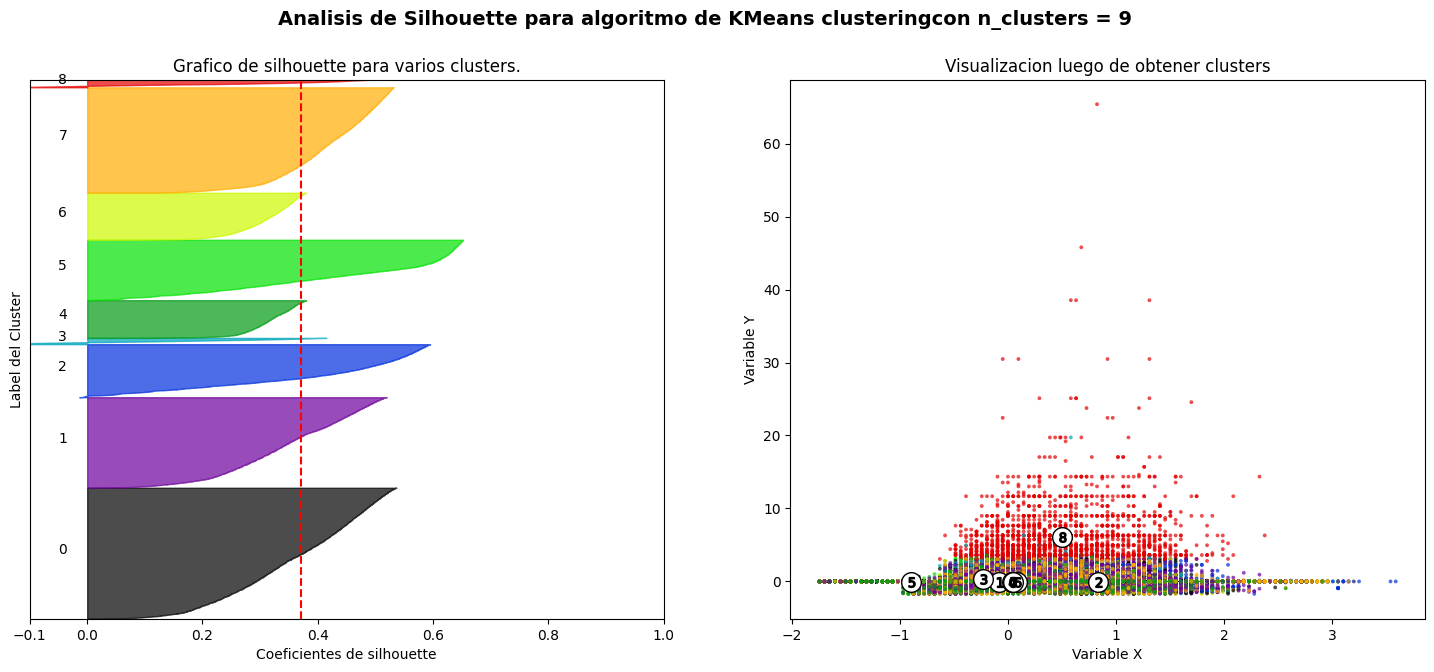

In [ ]:
for n_clusters in range(2, 10):
    # Crear un subplot de 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # El 1 subplot es para el score de silhouette
    # El rango del Ind. silhouette es [-1, 1]
    ax1.set_xlim([-0.1, 1]) # para nuestro caso lo voy a dejar en este rango
    # El (n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta
     # y el grafico de la nube de puntos
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Iniciamos el proceso de ajuste a los datos
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # El score de silhouette_score da el promedio de todos los valores
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promedio del score de silhouette es: ", silhouette_avg)
    # Calcular el score de silhouette para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregar los scores de silhouette para las muestras pertenecientes al cluster i y ordenarlos
        ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort() # Ordenar
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # Tamaño de clusters
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters) # Definir paleta de colores
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Etiquetar las graficas de silhouette con sus miembros de cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Calcular el nuevo y_lower para la proxima grafica
        y_lower = y_upper + 10
    ax1.set_title("Grafico de silhouette para varios clusters.")
    ax1.set_xlabel("Coeficientes de silhouette")
    ax1.set_ylabel("Label del Cluster")
    # La linea vertical para el promedio del score de silhouette de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Quitar labels en y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # definir ticks para comparacion

    # 2 grafica mostrando los clusters formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) # definir colores
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k') # scatterplot
    # Etiquetar a los clusters
    centers = clusterer.cluster_centers_
    # Dibujar en color blanco los centroides de los clusters
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    # Enumerar los centroides
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("Visualizacion luego de obtener clusters")
    ax2.set_xlabel("Variable X")
    ax2.set_ylabel("Variable Y")

    plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering"
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

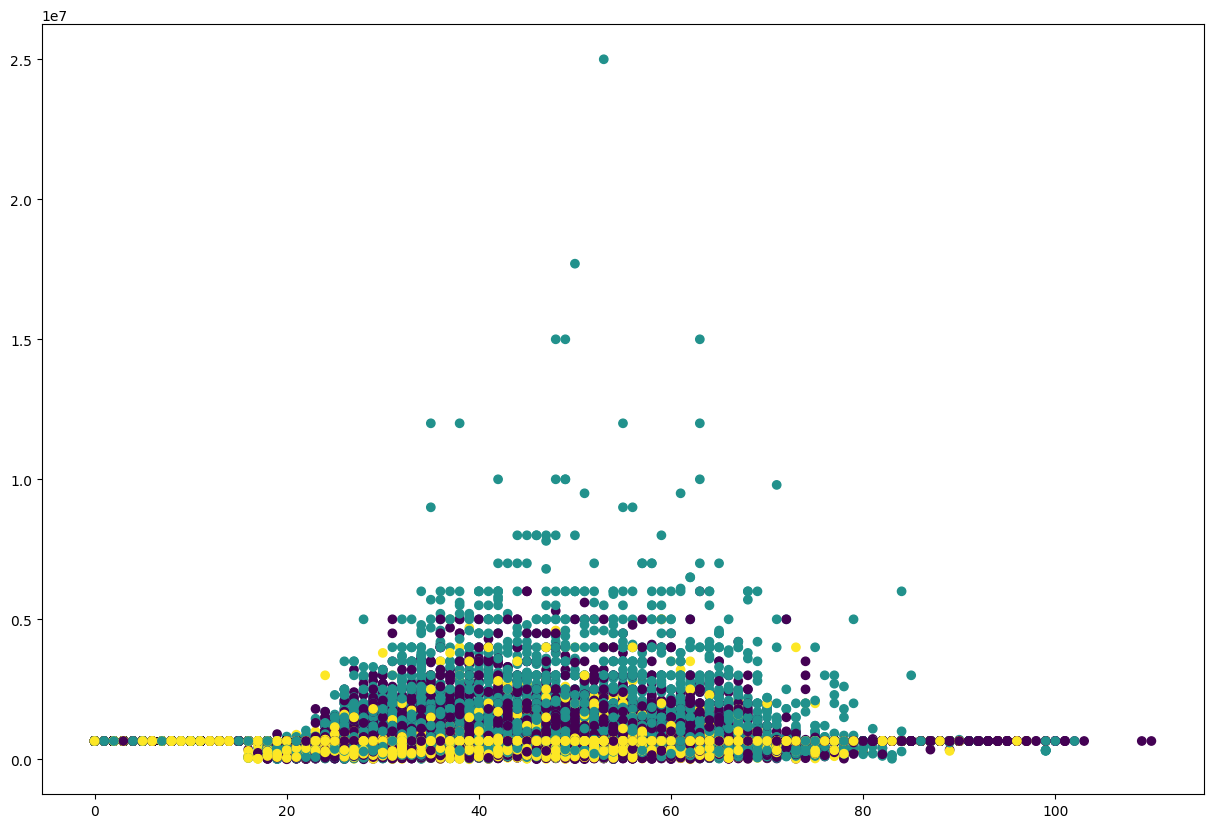

In [ ]:
# desnormalizar los datos
X = sc.inverse_transform(X)
plt.figure(figsize=(15,10))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

In [ ]:
def normalize(df):
    result = df.copy()

    for feature_name in df.columns:
        max_val = df[feature_name].max()
        min_val = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_val) / (max_val - min_val)

    return result

##5.- Entrenamiento del Modelo

In [ ]:
df.head()

,region,edad,ecivil,e6a,o7,oficio1_08,o32,y1,ytoth,o15,o4,genero,zonas,Train
0,Región de Tarapacá,0.309091,Soltero(a),Educación Media,NaN,Trabajadores de los servicios y vendedores de ...,NaN,0.026108,0.003889,Trabajador por cuenta propia,NaN,0.0,1.0,0
1,Región de Tarapacá,0.036364,NaN,Educación Especial (Diferencial),NaN,NaN,NaN,0.026108,0.003889,NaN,NaN,0.0,1.0,1
2,Región de Tarapacá,0.409091,Soltero(a),Educación Técnica,NaN,Trabajadores de los servicios y vendedores de ...,Cotiza,0.014833,0.009429,Empleado u obrero del sector privado,NaN,1.0,1.0,1
3,Región de Tarapacá,0.045455,NaN,Educación Básica,NaN,NaN,NaN,0.026108,0.009429,NaN,NaN,0.0,1.0,0
4,Región de Tarapacá,0.172727,Soltero(a),Educación Técnica,NaN,Artesanos y operarios de oficios,NaN,0.026108,0.009429,Trabajador por cuenta propia,NaN,0.0,1.0,1


In [ ]:
dummies = pd.get_dummies(df.ecivil)


In [ ]:
df = pd.concat([df, dummies], axis='columns')

In [ ]:
dummies = pd.get_dummies(df.e6a)

In [ ]:
df = pd.concat([df, dummies], axis='columns')

In [ ]:
dummies = pd.get_dummies(df.oficio1_08)

In [ ]:
df = pd.concat([df, dummies], axis='columns')

In [ ]:
dummies = pd.get_dummies(df.o15)

In [ ]:
df = pd.concat([df, dummies], axis='columns')

####Se realizan distintas transformaciones de datos, debido a que estás columnas son categoricas y para incluirlas en el modelo deben ser numericas o bytes, de este modo, una vez analizado la correlación podemos mantener diversas columnas que alimentan los datos y hacen que nuestro modelo aumente su capacidad de accuracy.

In [ ]:
#borramos las columnas categoricas o que no agregan valor
df = df.drop(['region', 'o15', 'o4', 'o7','Nunca asistió', 'No bien especificado', 'No responde','Familiar no remunerado', 'ecivil', 'e6a', 'oficio1_08', 'o32'], axis='columns')

In [ ]:
k = 6 # Definir los grupos
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
centroids

array([[ 3.75641297e-01,  2.46050996e-02,  1.18669589e-02,
         4.19555982e-01,  9.07085103e-01,  5.57009730e-01,
         3.09579279e-01,  3.92627107e-02, -1.28613483e-17,
         6.57804577e-02,  5.70028779e-01,  1.53487735e-02,
         2.60902411e-14, -3.74700271e-16,  4.47974990e-14,
        -1.01307851e-14,  9.99725915e-01,  5.13909826e-03,
         7.61956969e-02,  2.21323832e-02,  7.33178018e-03,
         4.95409072e-02,  4.55666712e-02,  7.45511854e-02,
         1.73358915e-02,  1.44854050e-01,  2.53734411e-01,
         7.72920378e-02,  3.61107304e-01,  8.28422639e-02,
         5.96135398e-03,  2.86419076e-02,  1.85007537e-03,
         5.75579005e-03,  1.38001919e-01],
       [ 3.25599608e-01,  2.27927236e-02,  8.16590442e-03,
         4.95594714e-01,  8.38752535e-01,  5.52094259e-01,
        -1.01529896e-13,  3.33066907e-15, -1.82959117e-17,
        -9.55485691e-15,  1.00000000e+00,  4.30905311e-15,
         1.16850973e-13,  1.85301727e-02,  9.51122299e-01,
        -1.70

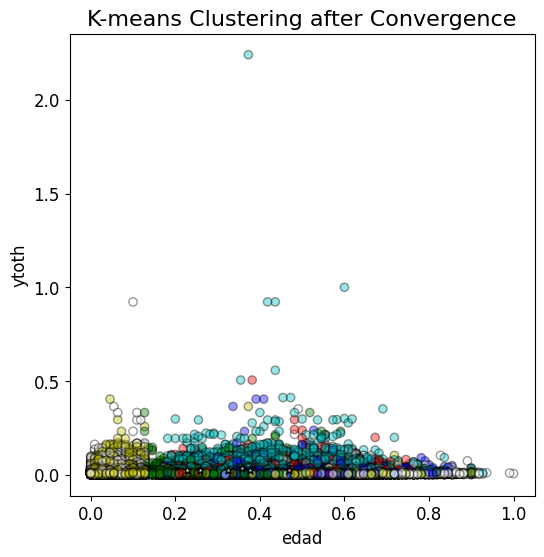

In [ ]:
# Graficar la data
plt.figure(figsize=(6, 6))
color_map = {1:'r', 2:'g', 3:'b' , 4:'c', 5:'y', 6:'w'}
colors = [color_map[x+1] for x in labels]

plt.scatter(df['edad'], df['ytoth'], color=colors, alpha=0.4, edgecolor='k')
for idx, centroid in enumerate(centroids):
  plt.scatter(centroid[0], centroid[1], marker='*', edgecolor='k')
plt.xlabel('edad', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('ytoth', fontsize=12)
plt.yticks(fontsize=12)
plt.title('K-means Clustering after Convergence', fontsize=16)
plt.show()

####Acá podemos visualizar distintos datos una vez hechos los clúster y vemos como convergen juntos, claramente el grupo turquesa es el grupo mayoritario y podemos alcanzar a ver como grupos pequeños, como el rosado, blanco y amarillo se pierden dentro de los mayoritarios.

###5.1.- Primer modelo

####Uno de los primeros modelos a experimentar es el RandomForestClassifier, debido a que este sirve para predecir el tipo de variable que estamos buscando, en este caso, poder definir si existe una brecha y si este modelo, con estos datos, estos hiperparametros y otras variables, es capaz de predecir o calcular alguna brecha.

In [ ]:
# División de los datos en train y test
X = df.drop(columns = ['genero']) # Matriz de 2 columnas -Variable Independientes
y = df['genero'] # Vector de 9235 filas y 1 columa- Variable Dependiente

In [ ]:
# Separar en train y test
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(102684, 34) (44008, 34)


In [ ]:
# Creación del modelo
model_rf = RandomForestClassifier(criterion="gini", max_depth=6, random_state=0)
model_rf.fit(X_train, y_train)

# Predicción
y_pred = model_rf.predict(X_test)

In [ ]:
#Evaluación básica del modelo

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.6420650790765315


 El modelo arroja un 0.642 de acertividad, lo que indica que está funcionando de mejor manera que antiguos modelos ya que fueron usados los parametros entregados por el hypertunning de parametros, antiguamente con otros modelos, menores datos y otras variables el modelo no sobrepasaba el 50% de acertividad.

###5.2.- Segundo Modelo

####Ahora probaremos un segundo modelo, especializado en buscar este tipo de variables, el support vector machine es mucho más efectivo para casos en donde el hiperplano tiene limites muy diminutos para hacer diferencia entre los clústers y en este caso, tiene sentido ya que las variables que hacen la diferencia son muy especificas y parecidas en ambos casos.

In [ ]:
# División de los datos en train y test
X = df.drop(columns = ['genero']) # Matriz de 2 columnas -Variable Independientes
y = df['genero'] # Vector de 9235 filas y 1 columa- Variable Dependiente

In [ ]:
# Separar en train y test
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(102684, 34) (44008, 34)


In [ ]:
# Creación del modelo SVM
modelo = SVC(C=0.1,kernel='rbf',random_state=42)
modelo.fit(X_train, y_train) #elegimos rbf para crear formas más complejas o curvas para que pueda ajustarse mejor a nuestros datos

SVC(C=0.1, random_state=42)

In [ ]:
#Predicciones!
#y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [ ]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.6476549718233049


In [ ]:
y_test_pred

contador1 = 0
contador0 = 0

for elemento in y_test_pred:
  if elemento == 1:
    contador1 += 1
  else:
    contador0 += 1

print("Número de Mujeres:", contador1)
print("Número de Hombres:", contador0)

Número de Mujeres: 20658
Número de Hombres: 23350


####En el segundo caso, tenemos un porcentaje de acertividad del 0.647 que si bien no es muy diferente al anterior, están ambos en el 0.64, es muy importante destacar que, a pesar de que el random forest sea "más simple" es muchisímo más efectivo cuando se sabe hacer un buen hypertunning de parametros y con eso podemos concluir, que efectivamente la búsqueda de parámetros es super importante al momento de realizar un modelo, ya que podemos reducir varios recursos al hacer modelos simples bien personalizados.

##6.- Búsqueda de Parámetros

####Para la busqueda de parámetros trabajaremos con XGBClassifier que es uno de los algoritmos más rapidos para este tipo de análisis

In [ ]:
model= xgb.XGBClassifier(learning_rate=0.001)
# Lista de hiperparametros
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10}

In [ ]:
# Modelo 1
model.set_params(**params_1).fit(X_train, y_train)
print(f'Accuracy para Modelo 1 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')
# Modelo 2
model.set_params(**params_2).fit(X_train, y_train)
print(f'Accuracy para Modelo 2 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')
# Modelo 3
model.set_params(**params_3).fit(X_train, y_train)
print(f'Accuracy para Modelo 3 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')

Accuracy para Modelo 1 = 0.60275
Accuracy para Modelo 2 = 0.59701
Accuracy para Modelo 3 = 0.61139


In [ ]:
params_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5,6,7],
        'criterion':['entropy','gini']
        }

In [ ]:
# tiempo de ejecucion
grid_cv = GridSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores Parametros {'colsample_bytree': 1.0, 'criterion': 'entropy', 'gamma': 5, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 1.0}
Mejor CV score 0.6060145689688754
Accuracy del modelo = 0.59694


In [ ]:
# tiempo de ejecucuon 7 seg
grid_cv = RandomizedSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores parametros {'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 7, 'gamma': 5, 'criterion': 'entropy', 'colsample_bytree': 1.0}
Mejor score de CV 0.6060145689688754
Accuracy del modelo = 0.59694


In [ ]:
# tiempo de ejecucuon 125 seg
halving_cv = HalvingGridSearchCV(model, params_grid, scoring="accuracy", factor=3)
halving_cv.fit(X_train, y_train)

print("Mejores parametros", halving_cv.best_params_)
print("Mejor Score CV", halving_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, halving_cv.predict(X_test)), 5)}')

Mejores parametros {'colsample_bytree': 1.0, 'criterion': 'gini', 'gamma': 1.5, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 1.0}
Mejor Score CV 0.600084251389194
Accuracy del modelo = 0.59735


In [ ]:
# tiempo de ejecucion 13 seg
halving_cv = HalvingRandomSearchCV(model, params_grid, scoring="accuracy", factor=3)
halving_cv.fit(X_train, y_train)

print("Mejores parametros", halving_cv.best_params_)
print("Mejor CV score", halving_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, halving_cv.predict(X_test)), 5)}')

Mejores parametros {'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 7, 'gamma': 1.5, 'criterion': 'entropy', 'colsample_bytree': 0.8}
Mejor CV score 0.5777484370845657
Accuracy del modelo = 0.58978


####Ahora podemos ver cómo es el parametro criterion gini con max depth de 6 muestra la mayor acertividad para nuestros modelos de clasificación, asegurando que estemos utilizando el modelo de manera óptima para obtener los mejores resultados.

##7.- Conclusión

####Debido a que el modelo más acertivo es el modelo de Support Vector Machine, nos quedaremos con sus resultados, el que nos muestra que a pesar de tener un dataset mayoritario en datos de mujeres, en el que muy pocas variables contienen mayoritariamente datos de genero masculino.

Este 64% indica que este modelo si tiene la capacidad de predecir el género de una persona, ya que la diferencia es algo significativa. Existe literatura que indica que en Chile ya existen brechas de género en áreas laborales, educacionales y de empleos, que afectan directamente a los ingresos de la persona. Hemos podido analizar que efectivamente las mujeres se preparan más para la vida profesional, pero que también trabajan en espacios del estado o empresas publicas y no tanto privadas, esto explicaría porque las mujeres ganan menos.

Ahora que sabemos y hemos demostrado que existe una brecha, podríamos averiguar en trabajos futuros si este se puede reflejar añadiendoles más variables y así determinar cuanto sería la brecha que existe entre hombres y mujeres.

